In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos el fichero de python con las funciones para representar las gráficas:
import sys
sys.path.append("..")
from utils.viztools import *

# Para realizar los tests estadísticos vamos a importar de la librería scipy:
from scipy import stats
from scipy.stats import *

In [ ]:
df = pd.read_csv("../data/Metabolic_Syndrome_raw.csv")
df.sample(5)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
2304,71497,71,Female,Divorced,800.0,White,107.2,29.3,1,167.74,5.1,88,54,78,0
2364,71785,64,Male,Divorced,NaN,Black,102.1,28.4,0,6.06,6.0,100,43,70,1
2323,71605,38,Female,NaN,2000.0,White,86.2,26.4,0,3.37,5.5,85,47,144,0
35,62291,56,Male,Married,8200.0,Other,104.5,29.9,0,5.57,4.6,103,43,54,0
1996,70264,23,Female,Single,NaN,Asian,72.0,18.7,0,6.11,4.0,93,71,47,0


In [ ]:
# Vemos la información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [ ]:
# Obtenemos los valores de las columnas tipo string, para traducirlos al español más adelante:
df.Sex.value_counts()

Sex
Female    1211
Male      1190
Name: count, dtype: int64

In [ ]:
df.Marital.value_counts()

Marital
Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: count, dtype: int64

In [ ]:
df.Race.value_counts()

Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: count, dtype: int64

In [ ]:
# Traducimos todas las columnas al español:
columnas_español = ["Id", "Edad", "Sexo", "EstadoCivil", "Ingresos", "Etnia", "CircunferenciaCintura", "IMC", "Albuminuria", "CACu", "AcidoUrico", "GlucosaSangre", "HDL", "Trigliceridos", "SindromeMetabolico"]
df.columns = columnas_español

# Traducimos todos las columnas con valores string:
df.loc[df["Sexo"] == "Male", "Sexo"] = "Hombre"
df.loc[df["Sexo"] == "Female", "Sexo"] = "Mujer"

df.loc[df["EstadoCivil"] == "Married", "EstadoCivil"] = "Casado"
df.loc[df["EstadoCivil"] == "Single", "EstadoCivil"] = "Soltero"
df.loc[df["EstadoCivil"] == "Divorced", "EstadoCivil"] = "Separado"
df.loc[df["EstadoCivil"] == "Separated", "EstadoCivil"] = "Separado" # Juntamos Divorced + Separated, vamos a considerarlos como iguales
df.loc[df["EstadoCivil"] == "Widowed", "EstadoCivil"] = "Viudo"

df.loc[df["Etnia"] == "White", "Etnia"] = "Blanca"
df.loc[df["Etnia"] == "Black", "Etnia"] = "Negra"
df.loc[df["Etnia"] == "Asian", "Etnia"] = "Asiatica"
df.loc[df["Etnia"] == "Hispanic", "Etnia"] = "Hispana"
df.loc[df["Etnia"] == "MexAmerican", "Etnia"] = "Norteamericana"
df.loc[df["Etnia"] == "Other", "Etnia"] = "Otra"

# Observamos cómo ha quedado nuestro dataframe:
df.sample(5)

,Id,Edad,Sexo,EstadoCivil,Ingresos,Etnia,CircunferenciaCintura,IMC,Albuminuria,CACu,AcidoUrico,GlucosaSangre,HDL,Trigliceridos,SindromeMetabolico
1281,67390,56,Mujer,Separado,5400.0,Blanca,71.4,18.2,0,23.60,3.9,95,84,95,0
1003,66235,33,Mujer,Casado,2000.0,Asiatica,83.2,22.8,0,10.17,4.7,109,45,115,0
1637,68845,75,Mujer,Viudo,1000.0,Blanca,113.8,37.2,0,6.52,4.4,99,50,154,1
2225,71157,26,Mujer,Casado,2500.0,Negra,105.7,35.7,0,6.81,4.7,84,68,98,0
2069,70543,78,Mujer,Casado,2500.0,Negra,NaN,40.2,1,108.33,7.9,225,53,151,0


In [ ]:
# Comprobamos cuántos valores nulos hay y en qué columnas están:
df.isna().sum() / len(df) * 100

Id                       0.000000
Edad                     0.000000
Sexo                     0.000000
EstadoCivil              8.663057
Ingresos                 4.872970
Etnia                    0.000000
CircunferenciaCintura    3.540192
IMC                      1.082882
Albuminuria              0.000000
CACu                     0.000000
AcidoUrico               0.000000
GlucosaSangre            0.000000
HDL                      0.000000
Trigliceridos            0.000000
SindromeMetabolico       0.000000
dtype: float64

Tenemos 4 columnas con valores nulos, 1 de ellas con un 8,7% de nulos:
1. EstadoCivil: podemos crear una nueva categoría que sea *Desconocido*.

Las otras 3, tienen menos de un 5%, así que vamos a rellenarlas con la mediana o con la media:
1. Ingresos
1. CircunferenciaCintura
1. IMC

In [ ]:
df.describe()

,Id,Edad,Ingresos,CircunferenciaCintura,IMC,Albuminuria,CACu,AcidoUrico,GlucosaSangre,HDL,Trigliceridos,SindromeMetabolico
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


En CircunferenciaCintura y en IMC, la media y mediana se parecen mucho, así que da igual cuál utilizar. Sin embargo, en Ingresos hay bastante diferencia, así que vamos a utilizar la mediana, que parece más representativa.


Tenemos que tener en cuenta que esto va a generar un pequeño sesgo.

In [ ]:
# Rellenamos los valores nulos de EstadoCivil con la categoría Desconocido:
df.loc[df["EstadoCivil"].isna(), "EstadoCivil"] = "Desconocido"

# Completamos los valores nulos de Ingresos, CircunferenciaCintura e IMC con la mediana:
df.loc[df["Ingresos"].isna(), "Ingresos"] = df.Ingresos.median()
df.loc[df["CircunferenciaCintura"].isna(), "CircunferenciaCintura"] = df.CircunferenciaCintura.median()
df.loc[df["IMC"].isna(), "IMC"] = df.IMC.median()

In [ ]:
# Vamos a ver cómo está ahora nuestro dataframe con el método info():
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     2401 non-null   int64  
 1   Edad                   2401 non-null   int64  
 2   Sexo                   2401 non-null   object 
 3   EstadoCivil            2401 non-null   object 
 4   Ingresos               2401 non-null   float64
 5   Etnia                  2401 non-null   object 
 6   CircunferenciaCintura  2401 non-null   float64
 7   IMC                    2401 non-null   float64
 8   Albuminuria            2401 non-null   int64  
 9   CACu                   2401 non-null   float64
 10  AcidoUrico             2401 non-null   float64
 11  GlucosaSangre          2401 non-null   int64  
 12  HDL                    2401 non-null   int64  
 13  Trigliceridos          2401 non-null   int64  
 14  SindromeMetabolico     2401 non-null   int64  
dtypes: f

Ya no tenemos nulos y todas las columnas tienen un dtype adecuado para los datos que recogen.

In [ ]:
# Guardamos nuestros datos limpios en un csv nuevo:
df.to_csv("../data/Metabolic_Syndrome_clean.csv")

In [ ]:
# Cambiamos nuestra variable df al nuevo dataframe limpio:
df = pd.read_csv("../data/Metabolic_Syndrome_clean.csv", index_col=[0])
df.sample(2)

,Id,Edad,Sexo,EstadoCivil,Ingresos,Etnia,CircunferenciaCintura,IMC,Albuminuria,CACu,AcidoUrico,GlucosaSangre,HDL,Trigliceridos,SindromeMetabolico
399,63723,62,Mujer,Casado,2000.0,Norteamericana,101.8,32.1,1,30.91,8.4,151,41,190,1
1958,70122,37,Mujer,Casado,6200.0,Blanca,128.3,43.6,0,8.15,5.0,102,72,114,0


### DEFINICIÓN Y TIPIFICACIÓN DE VARIABLES

In [ ]:
# Vamos a obtener la cardinalidad, su porcentaje y el tipo de variable según la cardinalidad:
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100]).T.rename(columns = {0: "Card", 1: "%_Card"})
df_tipificacion["Tipo_variable"] = "Categórica"
df_tipificacion.loc[df_tipificacion.Card == 2, "Tipo_variable"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Tipo_variable"] ="Numérica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Tipo_variable"] = "Numérica Continua"
df_tipificacion

,Card,%_Card,Tipo_variable
Id,2401.0,100.000000,Numérica Continua
Edad,61.0,2.540608,Numérica Discreta
Sexo,2.0,0.083299,Binaria
EstadoCivil,5.0,0.208247,Categórica
Ingresos,14.0,0.583090,Numérica Discreta
Etnia,6.0,0.249896,Categórica
CircunferenciaCintura,635.0,26.447314,Numérica Discreta
IMC,322.0,13.411079,Numérica Discreta
Albuminuria,3.0,0.124948,Categórica
CACu,1383.0,57.601000,Numérica Continua


| Columna/Variable      | Descripción                                                                | Tipo de variable  | Importancia inicial |
| --------------------- | -------------------------------------------------------------------------- | ----------------- | ------------------- |
| Id                    | Identificador del sujeto de estudio                                        | Índice único      |         3           |
| Edad                  | Edad del sujeto (años)                                                     | Numérica discreta |         3           |
| Sexo                  | Género del sujeto                                                          | Binaria           |         2           |
| EstadoCivil           | Estado civil del sujeto                                                    | Categórica        |         1           |
| Ingresos              | Ingresos económicos mensuales ($)                                          | Numérica discreta |         1           |
| Etnia                 | Etnia a la que pertenece el sujeto                                         | Categórica        |         1           |
| CircunferenciaCintura | Medida de la circunferencia de la cintura (cm)                             | Numérica discreta |         1           |
| IMC                   | Índice de Masa Corporal                                                    | Numérica discreta |         1           |
| Albuminuria           | Resultado del CACu: normal (0), moderadamente elevado (1), muy elevado (2) | Categórica        |         2           |
| CACu                  | Cociente albúmina-creatinina en orina (mg/g)                               | Numérica continua |         2           |
| AcidoUrico            | Ácido úricoe en sangre (mg/dL)                                             | Numérica discreta |         2           |
| GlucosaSangre         | Glucosa en sangre (mg/dL)                                                  | Numérica discreta |         2           |
| HDL                   | Colesterol HDL (mg/dL)                                                     | Numérica discreta |         1           |
| Trigliceridos         | Triglicéridos en sangre (mg/dL)                                            | Numérica discreta |         1           |
| SindromeMetabólico    | Diagnóstico de síndrome metabólico (1) o no (0)                            | Binaria           |         1           |

## ANÁLISIS UNIVARIANTE

### Variables categóricas

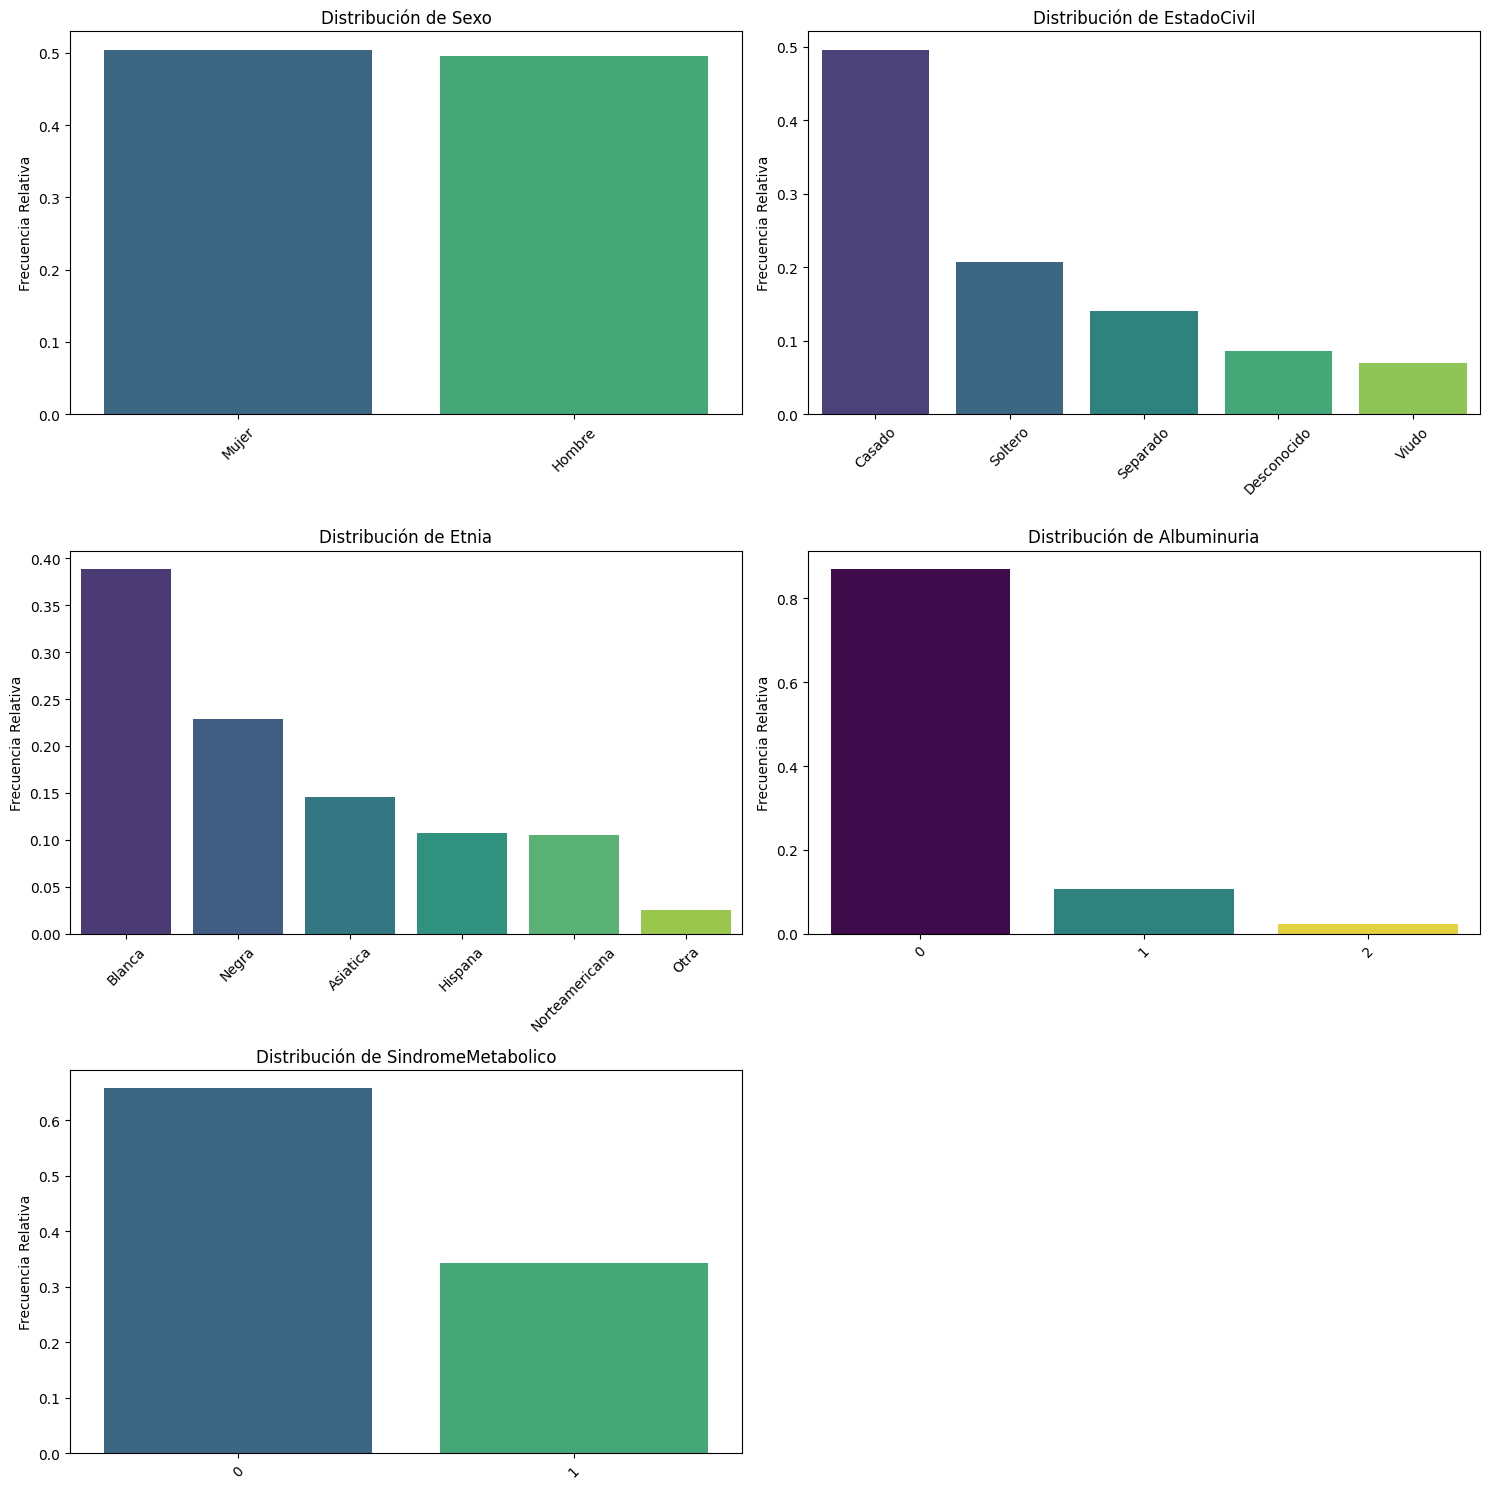

In [ ]:
# Creamos una lista con todas las variables categóricas y mostramos su distribución:
columnas_categoricas = ["Sexo", "EstadoCivil", "Etnia", "Albuminuria", "SindromeMetabolico"]
distribucion_categoricas(df, columnas_categoricas, relativa = True)

In [ ]:
# Obtenemos la moda de las columnas categóricas
df[columnas_categoricas].mode().T

,0
Sexo,Mujer
EstadoCivil,Casado
Etnia,Blanca
Albuminuria,0
SindromeMetabolico,0


In [ ]:
# Miramos la frecuencia relativa "en números":
print("LA FRECUENCIA RELATIVA ES:")
for col in columnas_categoricas:
    print(df[col].value_counts()/len(df)*100)
    print("")

LA FRECUENCIA RELATIVA ES:
Sexo
Mujer     50.437318
Hombre    49.562682
Name: count, dtype: float64

EstadoCivil
Casado         49.645981
Soltero        20.741358
Separado       14.035818
Desconocido     8.663057
Viudo           6.913786
Name: count, dtype: float64

Etnia
Blanca            38.858809
Negra             22.823823
Asiatica          14.535610
Hispana           10.703873
Norteamericana    10.537276
Otra               2.540608
Name: count, dtype: float64

Albuminuria
0    87.005414
1    10.578925
2     2.415660
Name: count, dtype: float64

SindromeMetabolico
0    65.764265
1    34.235735
Name: count, dtype: float64



No obtenemos demasiados datos al estudiar estas variables de forma individual. Aun así, podemos destacar:
- La mayor parte de la muestra tiene índices normales de albuminuria, sería interesante cruzar esa categoría con la columna de SindromeMetabolico.
- Casi el 50% de los sujetos están casados, podemos ver qué relación tiene con la columna de Ingresos y con la de SindromeMetabolico.
- Hay mitad de hombres y mitad de mujeres.
- Casi un 40% son de etnia blanca, habrá que ver qué distribución de positivos hay en cada etnia.

### Variables numéricas

(9, 2)


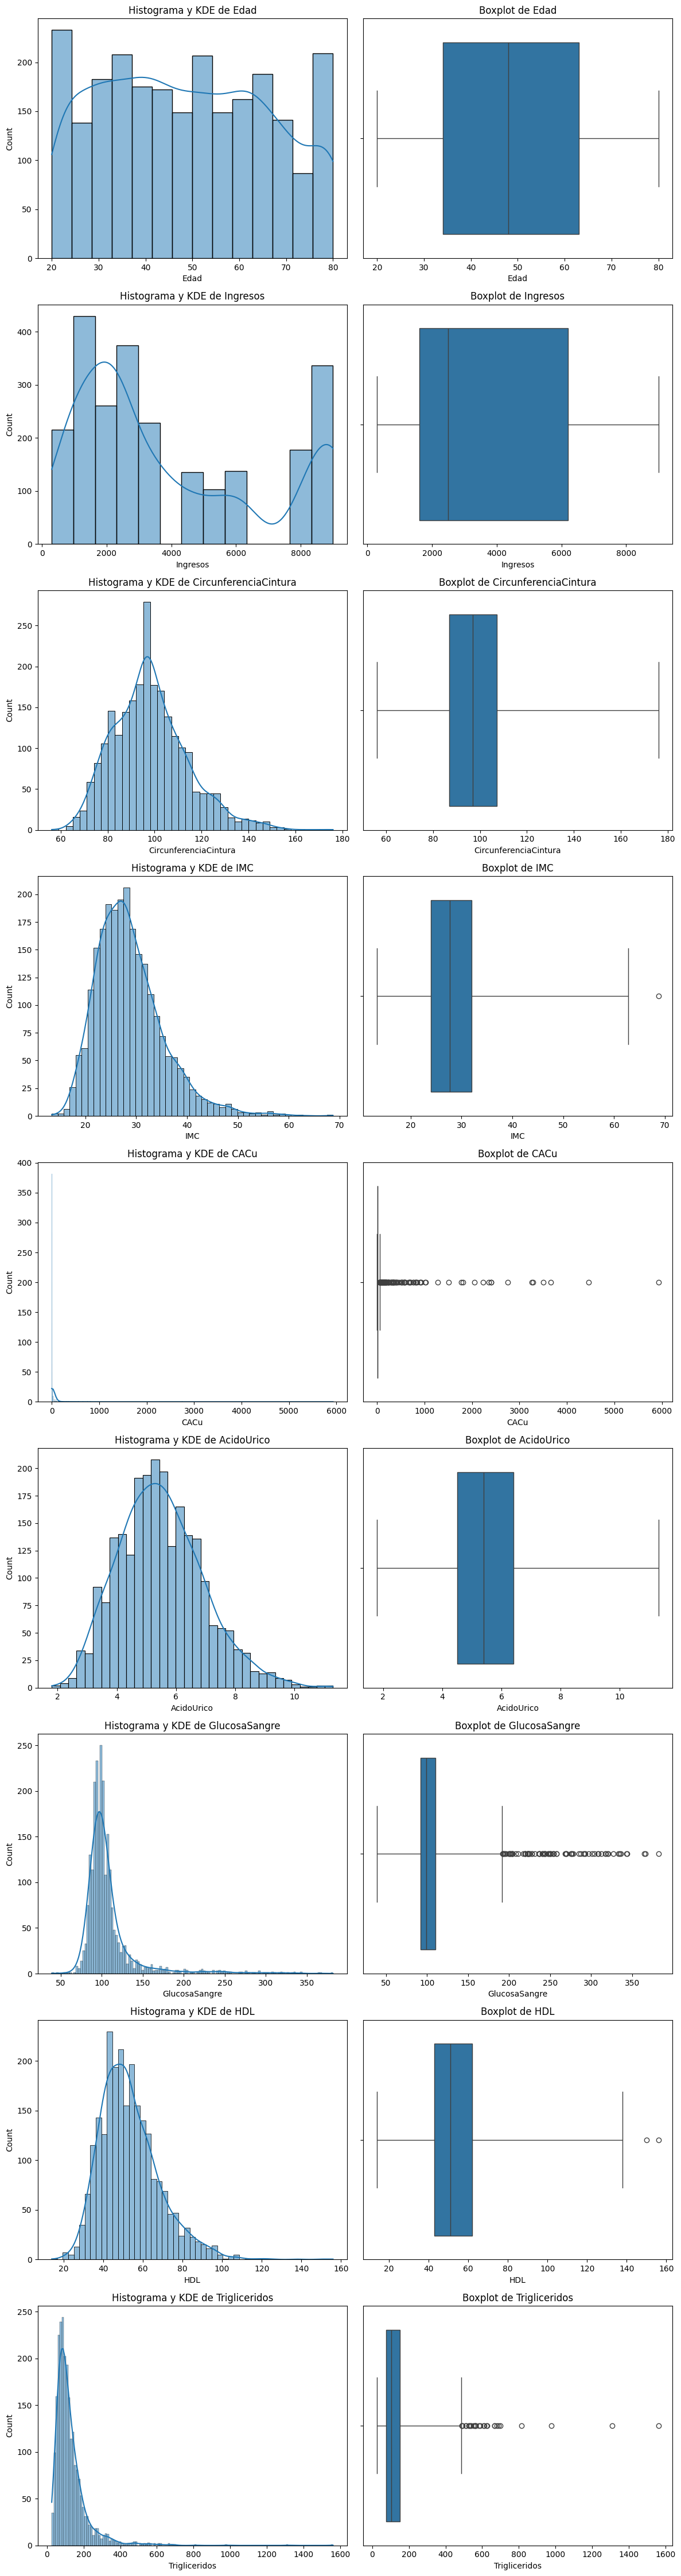

In [ ]:
# Creamos una lista con todas las variables numéricas de nuestro dataset:
columnas_numericas = ['Edad', 'Ingresos', 'CircunferenciaCintura', 'IMC', 'CACu', 'AcidoUrico', 'GlucosaSangre', 'HDL', 'Trigliceridos']
histograma_caja_bigotes(df, columnas_numericas, whisker_width = 4.5)

In [ ]:
# Obtenemos todos los valores descriptivos de las columnas numéricas:
df[columnas_numericas].describe()

,Edad,Ingresos,CircunferenciaCintura,IMC,CACu,AcidoUrico,GlucosaSangre,HDL,Trigliceridos
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,3931.903374,98.260975,28.691337,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2899.305678,15.964061,6.626869,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,87.000000,24.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.200000,32.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,5928.000000,11.300000,382.000000,156.000000,1562.000000


**Edad:**
- El 50% de los sujetos tienen entre 33 y 63 años, pero la muestra está bastante repartida.

**Ingresos:**
- Hay un grupo muy grande con ingresos alrededor de 2000$.
- Sería interesante dividir los ingresos en 3: de 0 a 3000, de 3000 a 6000 y de 6000 a 9000, para cruzar esta variable con la columna de SindromeMetabolico.

**CircunferenciaCintura:**
- El 50% de los sujetos tienen un valor entre 85 y 110 cm.
- Aparecen valores hasta los 180 cm.

**IMC:**
- La mayor parte de los sujetos tienen un IMC de entre 22 y 30. 
- Obtenemos un outlier (revisaremos si es un error).

**CACu:**
- En esta columna tenemos muchos outliers. Como los valores de Albuminuria dependen de esta columna, es posible que la eliminemos y nos quedemos con la de Albuminuria únicamente.

**AcidoUrico:**
- La mayor parte de valores están entre 4 y 6. 

**GlucosaSangre:**
- El 50% de la muestra está alrededor de 100, pero vemos una distribución poco homogénea.
- Encontramos muchos outliers, por lo que podríamos hacer un estudio sin outliers y con los outliers por separado.

**HDL:**
- Encontramos solo 2 outliers que podríamos investigar, aunque no se van mucho, comprobaremos si son un error o cuadran con el resto de valores de los sujetos.

**Trigliceridos:**
- El 50% de la muestra se encuentra entre 80 y 200. 
- También tenemos muchos outliers en esta columna. Algunos son muy exagerados, los investigaremos para ver si se trata de un error. 


In [ ]:
# Eliminamos la columna de CACu
df.drop(columns = "CACu", inplace = True)

In [ ]:
# Vamos a comprobar si el ourlier de IMC es un error:
df.loc[df["IMC"].idxmax()]

Id                        62849
Edad                         40
Sexo                      Mujer
EstadoCivil              Casado
Ingresos                 9000.0
Etnia                     Negra
CircunferenciaCintura     163.5
IMC                        68.7
Albuminuria                   0
AcidoUrico                  5.6
GlucosaSangre               107
HDL                          49
Trigliceridos                61
SindromeMetabolico            1
Name: 169, dtype: object

Parece que la circunferencia sí coincide con una persona con obesidad, aunque los valores sanguíneos y de orina parecen bastante normales. Vamos a contar con que es un outlier, pero no vamos a eliminarlo.

In [ ]:
# Vamos a mirar los outliers de HDL, para ver si son un error:
df.sort_values("HDL", ascending = False).head(2)

,Id,Edad,Sexo,EstadoCivil,Ingresos,Etnia,CircunferenciaCintura,IMC,Albuminuria,AcidoUrico,GlucosaSangre,HDL,Trigliceridos,SindromeMetabolico
1310,67487,75,Mujer,Viudo,1000.0,Negra,97.0,26.7,1,7.4,108,156,64,0
220,63064,61,Hombre,Separado,1000.0,Negra,87.2,18.7,1,7.1,105,150,74,0


Los valores de HDL son completamente compatibles con el resto de datos de los sujetos, así que no parece que haya ningún error. Tampoco vamos a eliminarlos.

In [ ]:
# Los outliers de Trigliceridos se alejaban bastante del resto de valores, vamos a ver esas entradas en concreto:
df.sort_values("Trigliceridos", ascending = False).head(10)

,Id,Edad,Sexo,EstadoCivil,Ingresos,Etnia,CircunferenciaCintura,IMC,Albuminuria,AcidoUrico,GlucosaSangre,HDL,Trigliceridos,SindromeMetabolico
2092,70617,45,Mujer,Desconocido,2000.0,Blanca,102.2,28.1,0,6.5,75,27,1562,1
1016,66268,58,Hombre,Casado,9000.0,Blanca,97.6,28.5,0,4.9,126,28,1311,1
829,65506,50,Hombre,Soltero,1600.0,Norteamericana,92.9,27.6,2,4.2,335,35,979,1
2196,71062,52,Hombre,Separado,1000.0,Blanca,114.2,33.4,2,8.1,128,29,814,1
2076,70562,52,Hombre,Desconocido,300.0,Blanca,103.5,24.9,0,5.4,91,52,700,0
1740,69272,43,Mujer,Desconocido,1600.0,Hispana,90.2,28.1,0,5.0,318,32,688,1
681,64930,74,Hombre,Separado,1600.0,Blanca,107.2,27.9,2,7.6,140,21,681,1
148,62757,54,Hombre,Separado,6200.0,Blanca,127.7,36.1,0,5.1,98,34,668,1
1979,70210,47,Hombre,Viudo,2000.0,Norteamericana,105.7,30.2,1,3.9,219,32,666,1
650,64803,35,Hombre,Casado,2500.0,Blanca,104.8,29.1,0,6.8,108,27,626,1


Vamos a eliminar los 2 outliers más alejados, ya que se alejan demasiado de la mayoría de valores de esa columna y no nos interesan especialmente esos valores, puesto que valores tan altos en triglicéridos indican otras patologías que no recogemos en este dataset.

In [ ]:
# Procedemos a eliminar esos dos outliers
indices_outliers_trigli = df.sort_values("Trigliceridos", ascending = False).head(2).index
df.drop(index = indices_outliers_trigli, inplace = True)

Una vez hemos limpiado esos outliers, vamos a volver a sacar las gráficas, para ver cómo queda:

(8, 2)


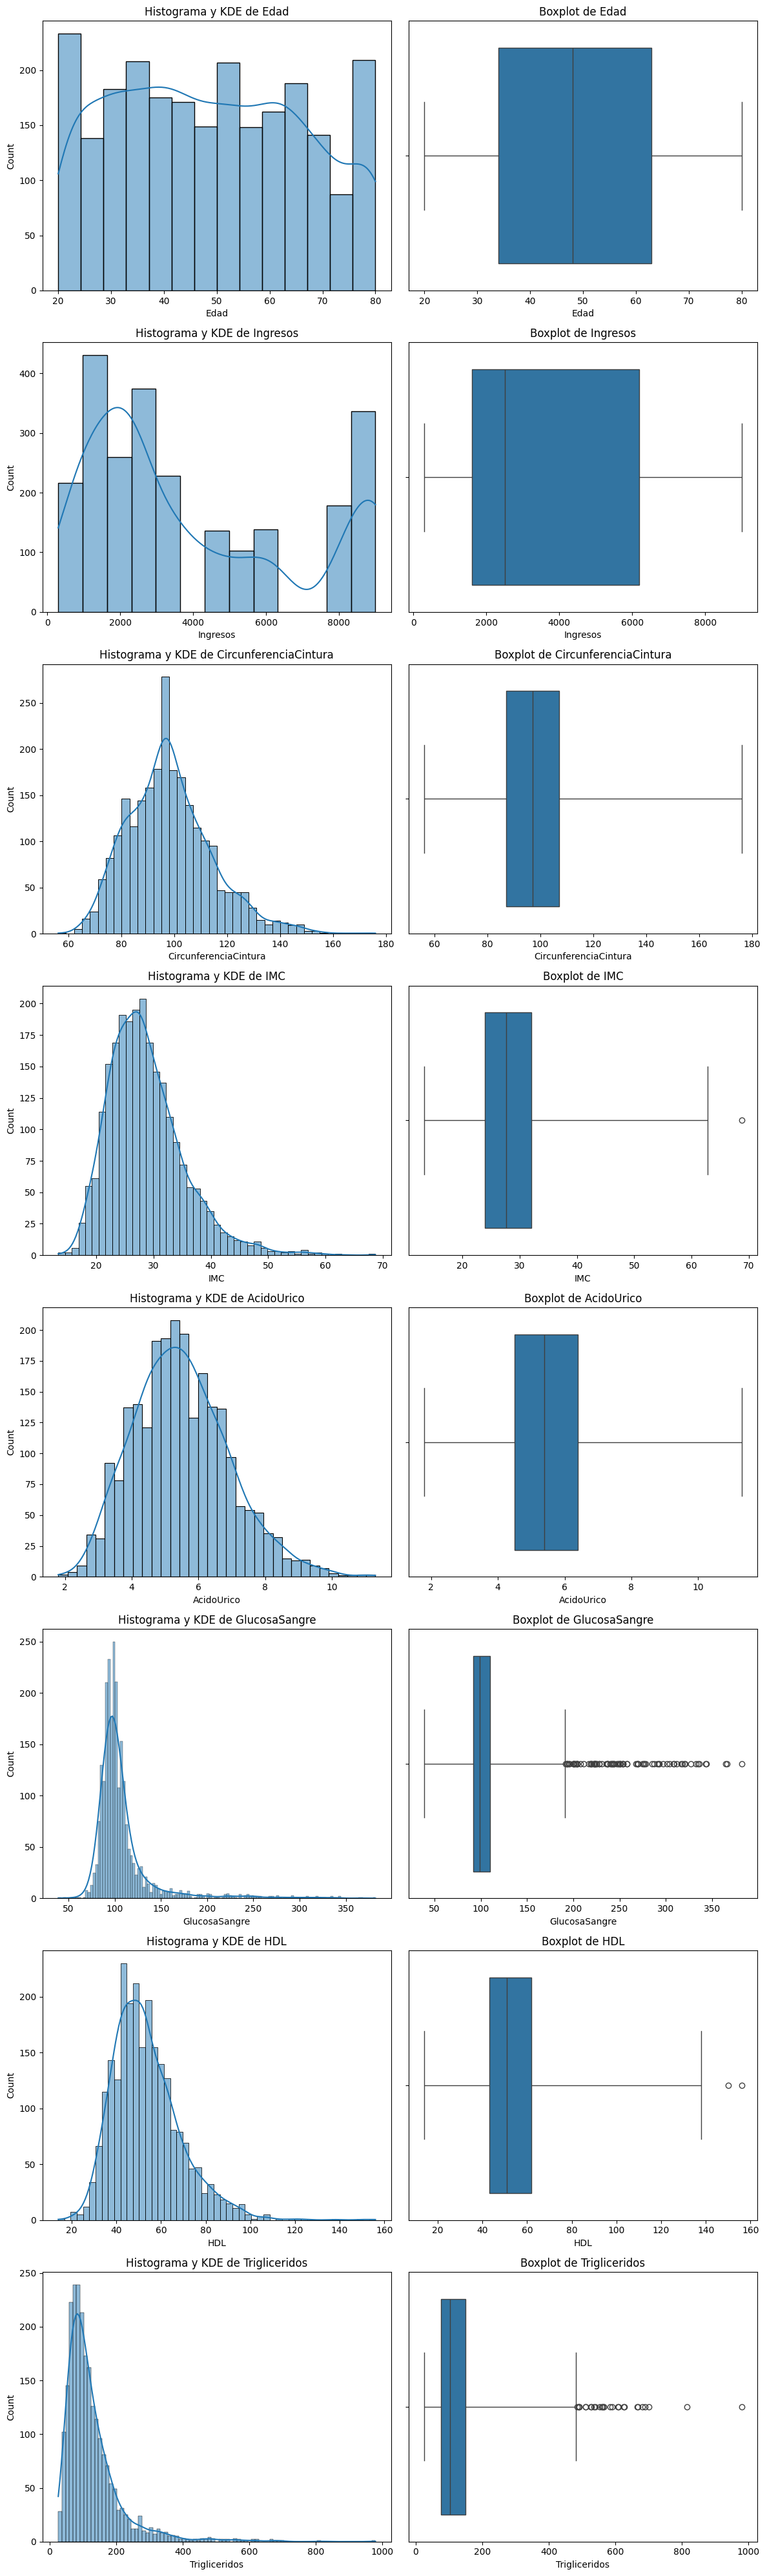

In [ ]:
# Quitamos la columna CACu de nuestra lista de columnas numéricas y volvemos a sacar las gráficas de tendencia:
columnas_numericas = ['Edad', 'Ingresos', 'CircunferenciaCintura', 'IMC', 'AcidoUrico', 'GlucosaSangre', 'HDL', 'Trigliceridos']
histograma_caja_bigotes(df, columnas_numericas, whisker_width = 4.5)

In [ ]:
# Guardamos nuestro dataset ya completamente limpio en un csv nuevo:
df.to_csv("../data/Metabolic_Syndrome_final_version.csv")

## ANÁLISIS BIVARIANTE

In [ ]:
# Cambiamos nuestra variable df a la versión final del dataset:
df = pd.read_csv("../data/Metabolic_Syndrome_final_version.csv", index_col=[0])

### PREGUNTAS




**1. ¿Hay alguna relación entre los ingresos mensuales y el diagnóstico de síndrome metabólico?**

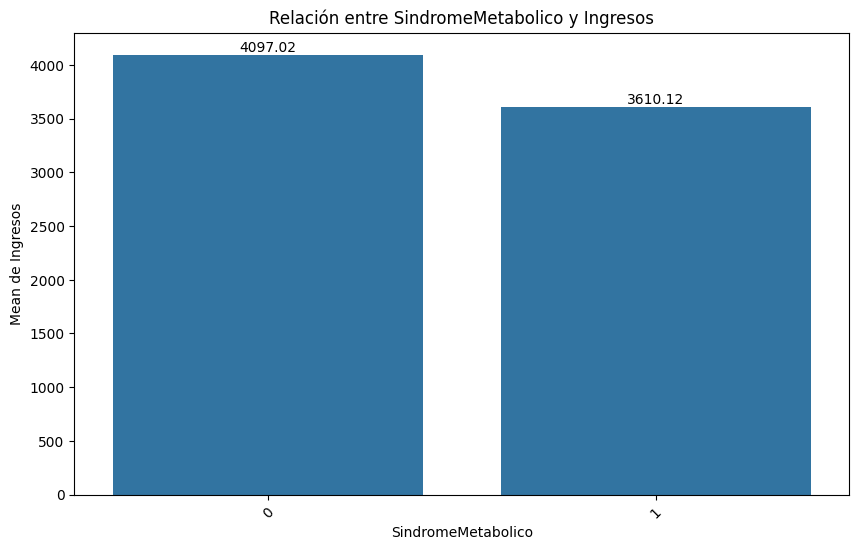

In [ ]:
relacion_categorica_numerica(df, "SindromeMetabolico", "Ingresos", show_values = True, measure = "mean")

c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:218: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat), palette = "viridis")
c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:218: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat), palette = "viridis")


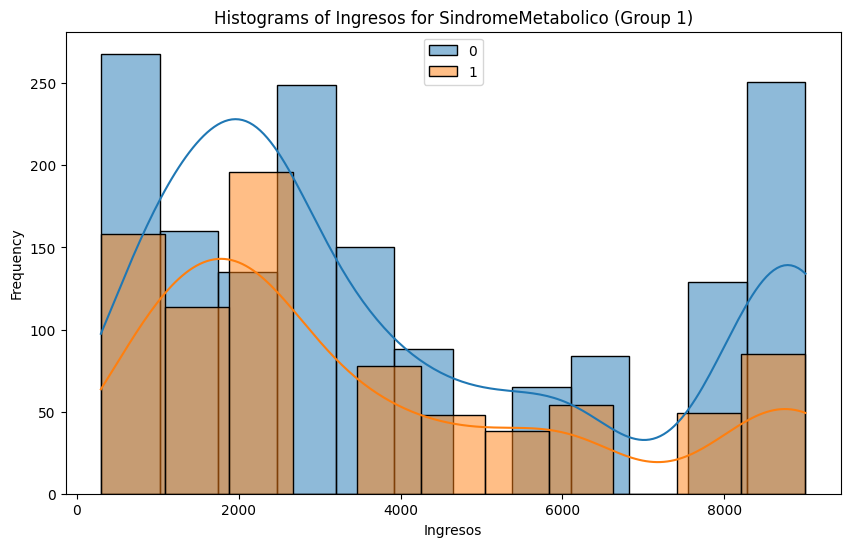

In [ ]:
histogramas_agrupados(df, cat_col = "SindromeMetabolico", num_col = "Ingresos", group_size= 2)

Parece que los sujetos diagnosticados con síndrome metabólico tienen una media de ingresos inferior a los que no están diagnosticados. Vamos a pasarle un estadístico para comprobar si realmente hay relación entre estas dos variables:

In [ ]:
# Dividimos nuestro dataset en 2 grupos: los que no tienen el diagnóstico y los que sí:
grupo_sano = df.loc[df.SindromeMetabolico == 0]["Ingresos"]
grupo_sm = df.loc[df.SindromeMetabolico == 1]["Ingresos"]

# Obtenemos los valores del estadístico U Mann-Whitney y los mostramos:
u_stat, p_valor = mannwhitneyu(grupo_sano, grupo_sm)
print("U-Statistic:", u_stat)
print("P-Value:", p_valor)

U-Statistic: 705411.0
P-Value: 0.0002898928834066906


Como P-Value < 0.05, rechazamos la hipótesis nula y podemos decir que sí hay relación entre estas dos variables: **los ingresos pueden influir en el diagnóstico de síndrome metabólico.**

**2. ¿Es influyente el estado civil de la persona?**

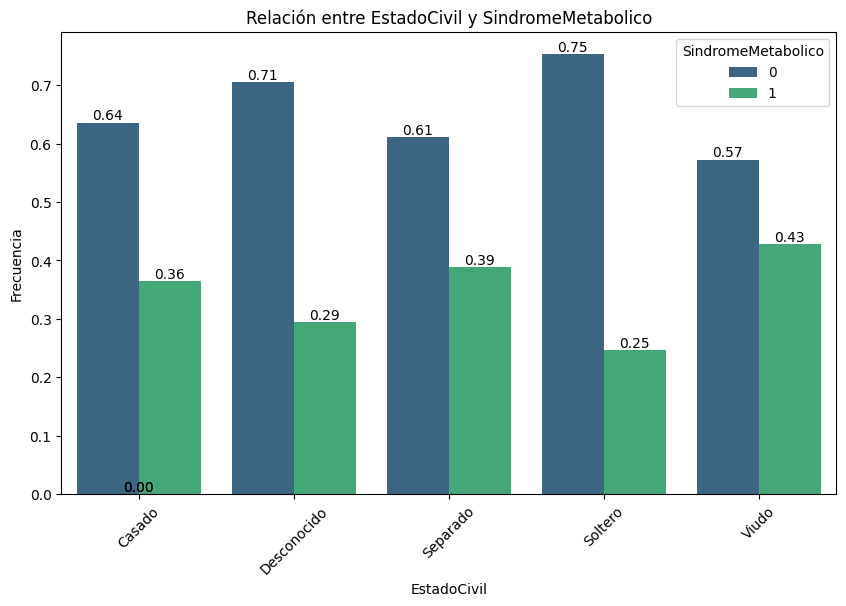

In [ ]:
relacion_categoricas(df, "EstadoCivil", "SindromeMetabolico", relative_freq = True, show_values = True)

Podríamos destacar que los viudos y separados parecen tener un mayor porcentaje de diagnóstico de síndrome metabólico, mientras que los solteros solo tienen un 25%. Vamos a utilizar el estadístico Chi-cuadrado para ver si hay relación entre la variable de estado civil y el síndrome:

In [ ]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["SindromeMetabolico"], df["EstadoCivil"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 33.388881540076
P-Value: 9.943363964008175e-07
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[783.90537724 136.24551897 221.81033764 327.77907461 109.25969154]
 [407.09462276  70.75448103 115.18966236 170.22092539  56.74030846]]


Como P-Value < 0.05, podemos afirmar que **el estado civil del sujeto influye en el diagnóstico de síndrome metabólico.**

**3. ¿Qué importancia tiene la etnia?**


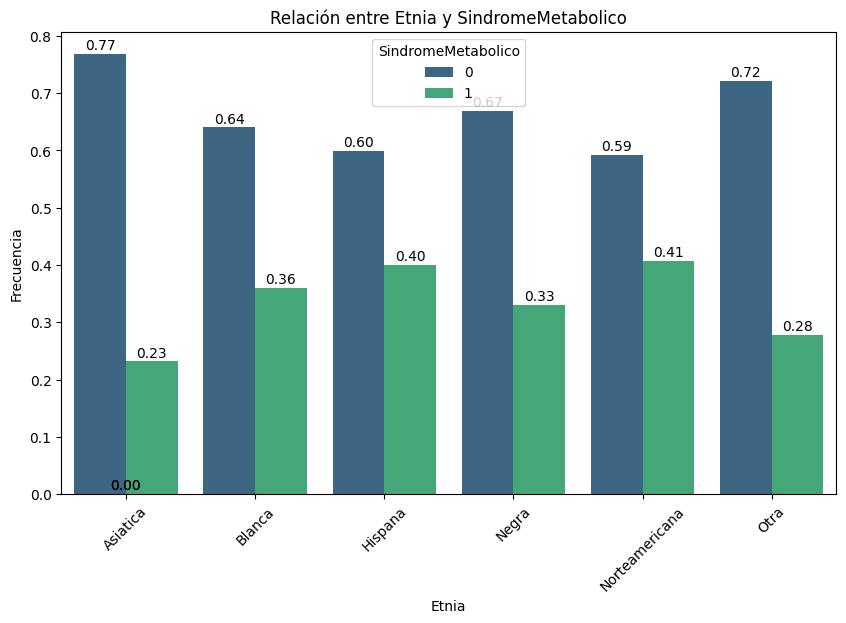

In [ ]:
relacion_categoricas(df, "Etnia", "SindromeMetabolico", relative_freq = True, show_values = True, size_group = 6)

Podemos destacar un mayor porcentaje de sujetos con síndrome metabólico en los grupos de etnia hispana y norteamericana (40%). Sin embargo, los asiáticos tienen un porcentaje muy bajo (23%). Vamos a pasar el estadístico Chi-cuadrado para ver si hay relación estadísticamente significativa:

In [ ]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["SindromeMetabolico"], df["Etnia"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 30.189565151490104
P-Value: 1.353402988562851e-05
Grados de Libertad: 5
Tabla de Frecuencias Esperadas:
 [[229.7086286  612.77573989 169.15506461 360.68862026 166.52230096
   40.14964569]
 [119.2913714  318.22426011  87.84493539 187.31137974  86.47769904
   20.85035431]]


Como P-Value < 0.05, podríamos decir que **la etnia del sujeto está relacionada con el diagnóstico de síndrome metabólico.**

**4. ¿Cómo influye la edad en el diagnóstico?**

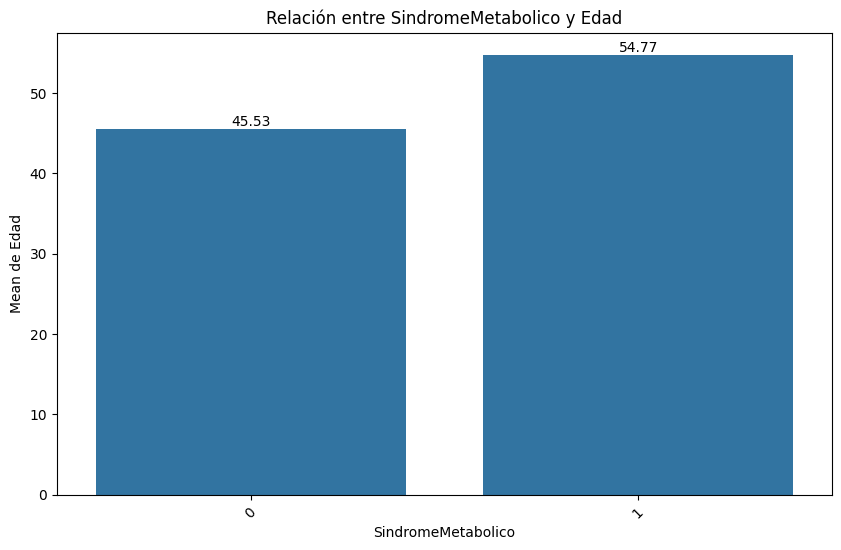

In [ ]:
relacion_categorica_numerica(df, "SindromeMetabolico", "Edad", show_values = True, measure = "mean")

c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:218: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat), palette = "viridis")
c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:218: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat), palette = "viridis")


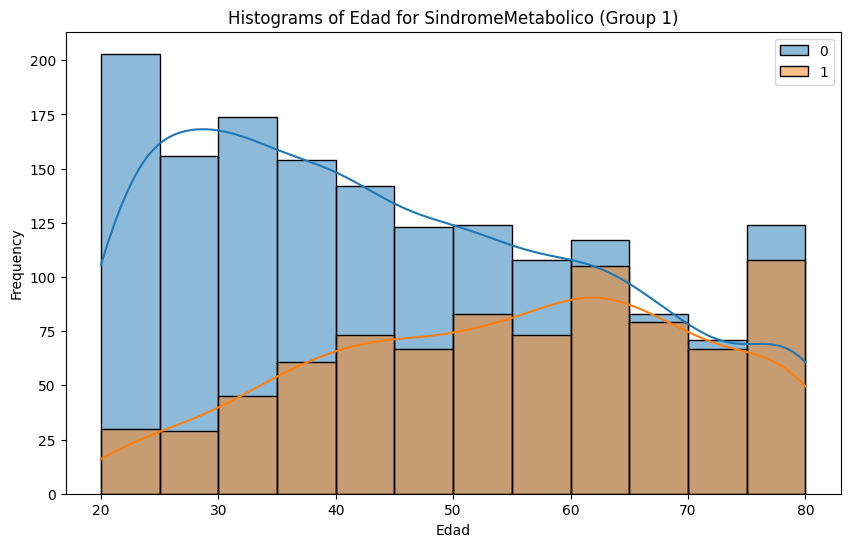

In [ ]:
histogramas_agrupados(df, cat_col = "SindromeMetabolico", num_col = "Edad", group_size= 2)

In [ ]:
# Dividimos nuestro dataset en 2 grupos: los que no tienen el diagnóstico y los que sí:
grupo_sano = df.loc[df.SindromeMetabolico == 0]["Edad"]
grupo_sm = df.loc[df.SindromeMetabolico == 1]["Edad"]

# Obtenemos los valores del estadístico U Mann-Whitney y los mostramos:
u_stat, p_valor = mannwhitneyu(grupo_sano, grupo_sm)
print("U-Statistic:", u_stat)
print("P-Value:", p_valor)

U-Statistic: 448175.5
P-Value: 3.26342743422504e-35


Observamos una clara relación entre edad y síndrome metabólico: a mayor edad, mayor número de casos.

**5. ¿Hay alguna relación entre el IMC y la circunferencia de la cintura con las etnias?**

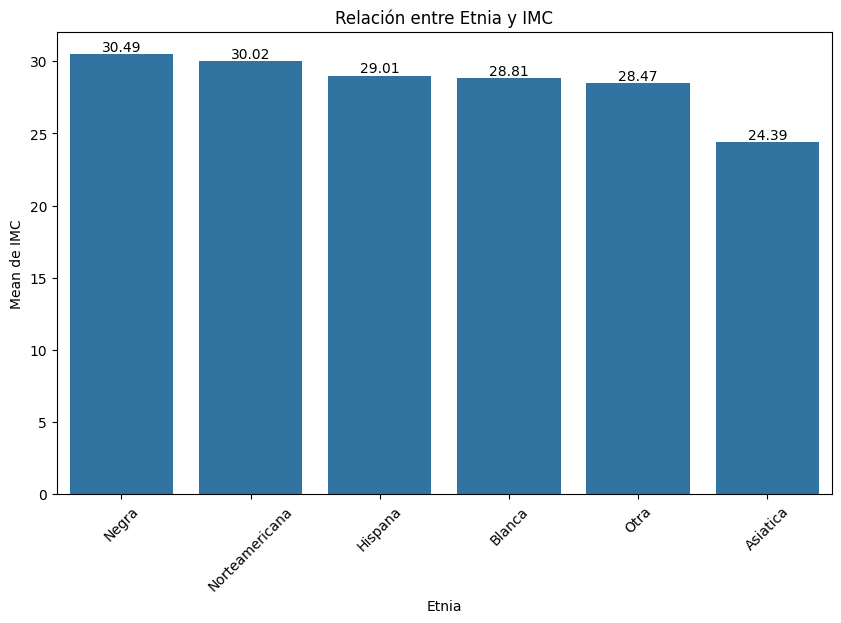

In [ ]:
relacion_categorica_numerica(df, "Etnia", "IMC", show_values = True, measure = "mean")

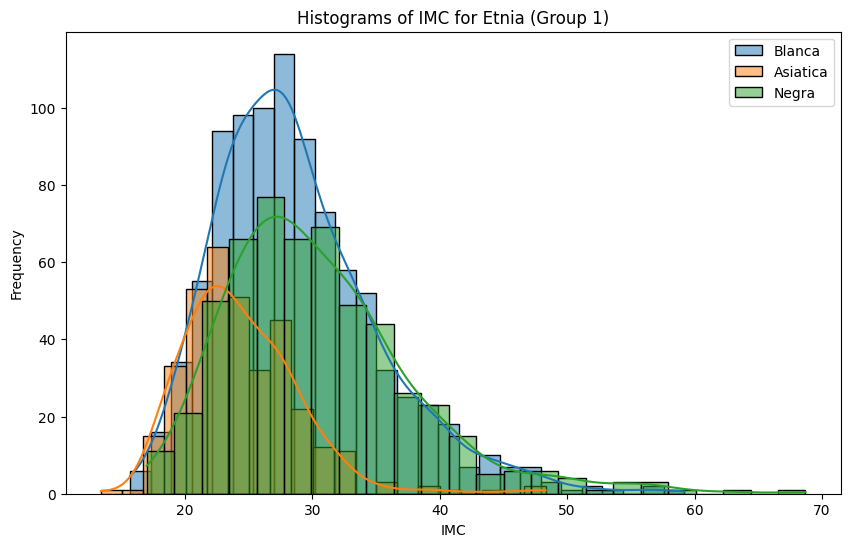

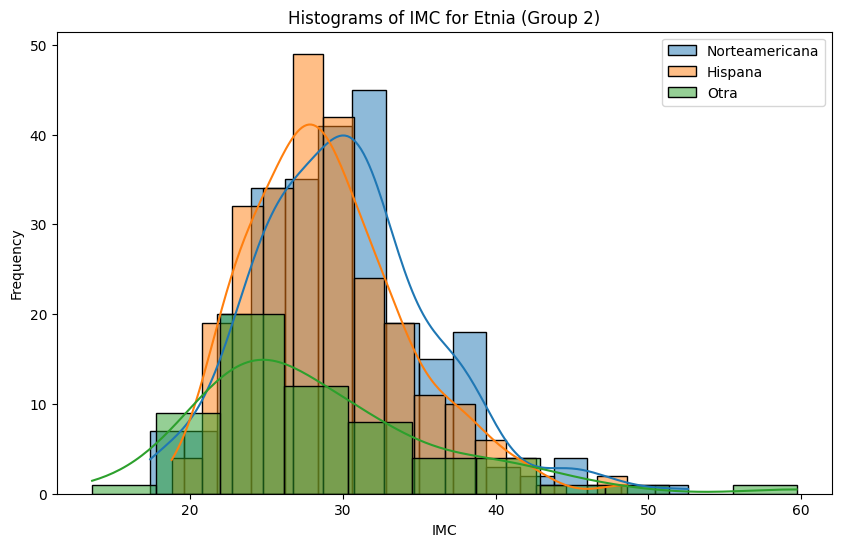

In [ ]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "IMC", group_size= 3)

En cuanto al IMC, sí que vemos una clara diferencia entre todas las etnias y la asiática, puesto que la media de este grupo es tan solo de 24.4, mientras que el restro está alrededor de 30.
Un dato que nos puede llamar la atención, es que la etnia negra tiene la mayor media en IMC; sin embargo, tiene un menor porcentaje de positivos en síndrome metabólico si lo comparamos con la etnia hispana y norteamericana. 

Para ver si tiene relevancia estadística, vamos a realizar el test de ANOVA:

In [ ]:
# Obtenemos el IMC en una lista agrupándolo por etnias:
grupos = df["Etnia"].unique()  
IMC_etnia = [df[df["Etnia"] == grupo]["IMC"] for grupo in grupos]

f_val, p_val = stats.f_oneway(*IMC_etnia)
print("F-Value:", f_val)
print("P-Value:", p_val)

F-Value: 43.114138614300465
P-Value: 1.1348371544454363e-42


C:\Users\mpuch\AppData\Local\Temp\ipykernel_16192\349420759.py:5: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_val, p_val = stats.f_oneway(*IMC_etnia)


Como podríamos esperar, el P-Value es menor que 0.05, por lo que sí hay relación entre la etnia y el IMC.

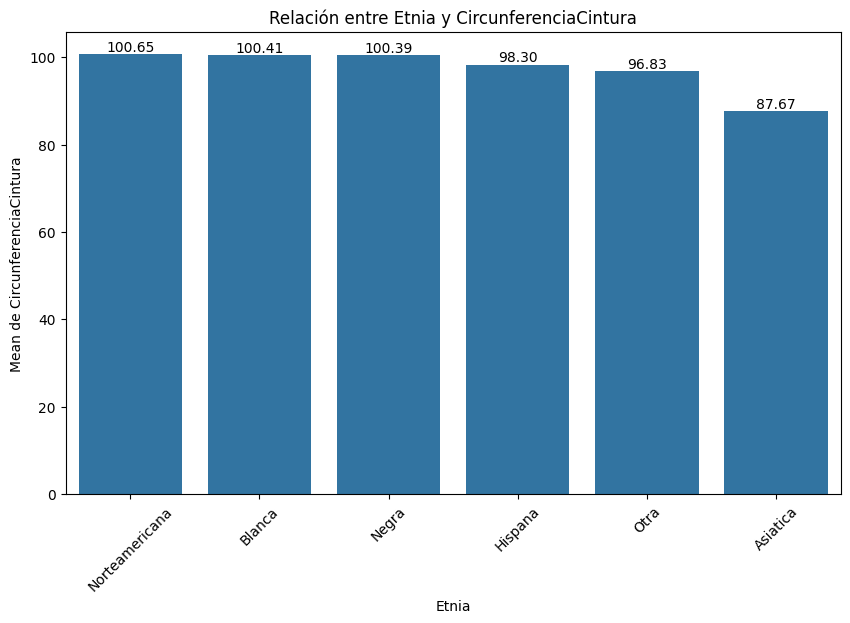

In [ ]:
relacion_categorica_numerica(df, "Etnia", "CircunferenciaCintura", show_values = True, measure = "mean")

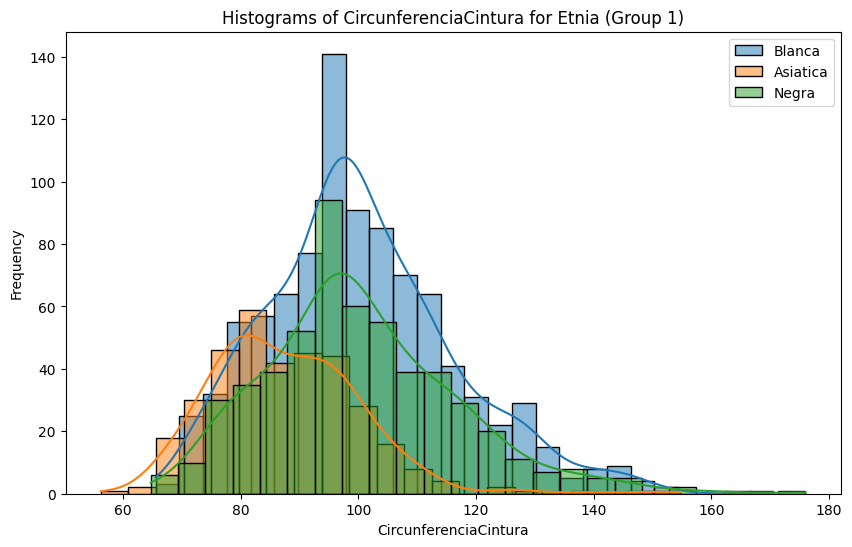

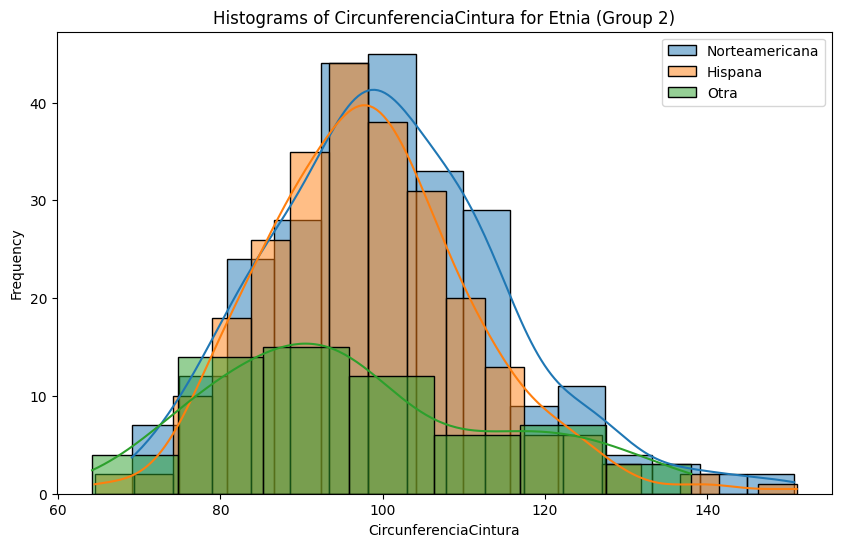

In [ ]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "CircunferenciaCintura", group_size= 3)

Si hablamos de circunferencia de la cintura, hay 3 etnias que no tienen prácticamente diferencia: la negra, la blanca y la norteamericana (alrededor de 100 cm). De esta manera, nos vuelve a llamar la atención cómo la norteamericana tiene un mayor porcentaje de positivos en síndrome metabólico.

Volvemos a utilizar el estadístico ANOVA:

In [ ]:
# Obtenemos la circunferencia de la cintura en una lista agrupándolo por etnias:
grupos = df["Etnia"].unique()  
IMC_etnia = [df[df["Etnia"] == grupo]["CircunferenciaCintura"] for grupo in grupos]

f_val, p_val = stats.f_oneway(*IMC_etnia)
print("F-Value:", f_val)
print("P-Value:", p_val)

F-Value: 40.311740283012654
P-Value: 6.513621972633501e-40


C:\Users\mpuch\AppData\Local\Temp\ipykernel_16192\4200551935.py:5: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_val, p_val = stats.f_oneway(*IMC_etnia)


Y efectivamente observamos que hay relación entre las variables.

Es decir, tanto el IMC como la circunferencia de la cintura tienen relación con la etnia del sujeto de estudio. Además, observamos dos cosas interesantes:
- La etnia negra tiene de media un IMC muy alto, sin embargo no es el grupo que mayor porcentaje de síndrome metabólico tiene.
- La etnia norteamericana tiene una media de circunferencia de la cintura muy parecida a la que tienen otras etnias, pero es una de las que más sujetos con síndrome metabólico tiene.

**6. ¿Y los valores de los indicadores sanguíneos con las etnias?**

Tendremos que ver cómo se comporta la albuminuria, ácido úrico, glucosa en sangre, HDL y triglicéridos en cada etnia.


**Albuminuria:**

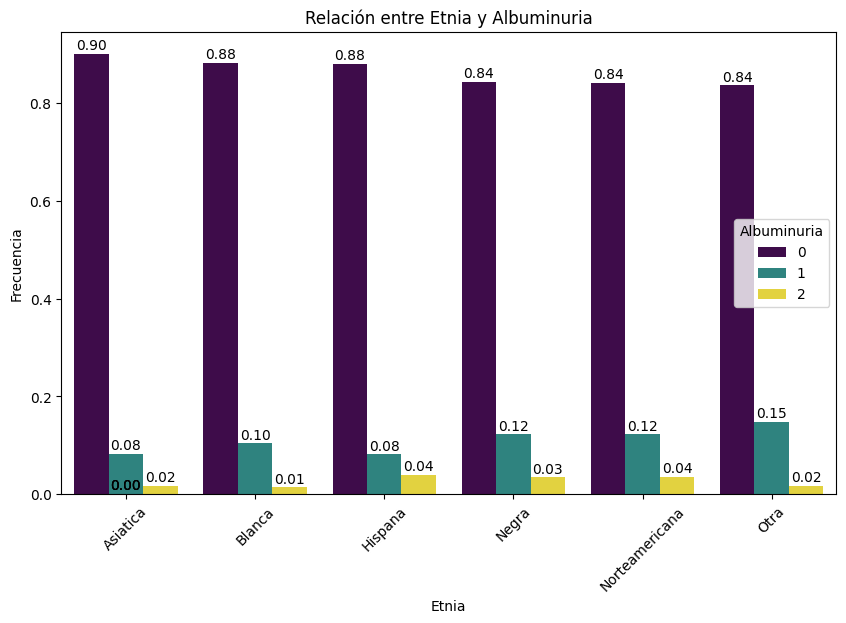

In [ ]:
relacion_categoricas(df, "Etnia", "Albuminuria", relative_freq = True, show_values = True, size_group = 6)

No parece que haya demasiada relación entre la etnia y la variable de albuminuria, aun así, para asegurarnos, pasamos el estadístico:

In [ ]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["Albuminuria"], df["Etnia"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 18.540720188517916
P-Value: 0.04649924671843136
Grados de Libertad: 10
Tabla de Frecuencias Esperadas:
 [[303.61108795 809.91954981 223.57607336 476.73030429 220.09629012
   53.06669446]
 [ 36.95122968  98.57190496  27.21050438  58.02084202  26.78699458
    6.45852439]
 [  8.43768237  22.50854523   6.21342226  13.24885369   6.1167153
    1.47478116]]


Tras realizar el análisis, observamos que P-Value es menor que 0.05, por poco, así que sí podemos decir que hay relación, aunque no creo que sea muy interesante. 

**Ácido úrico:**

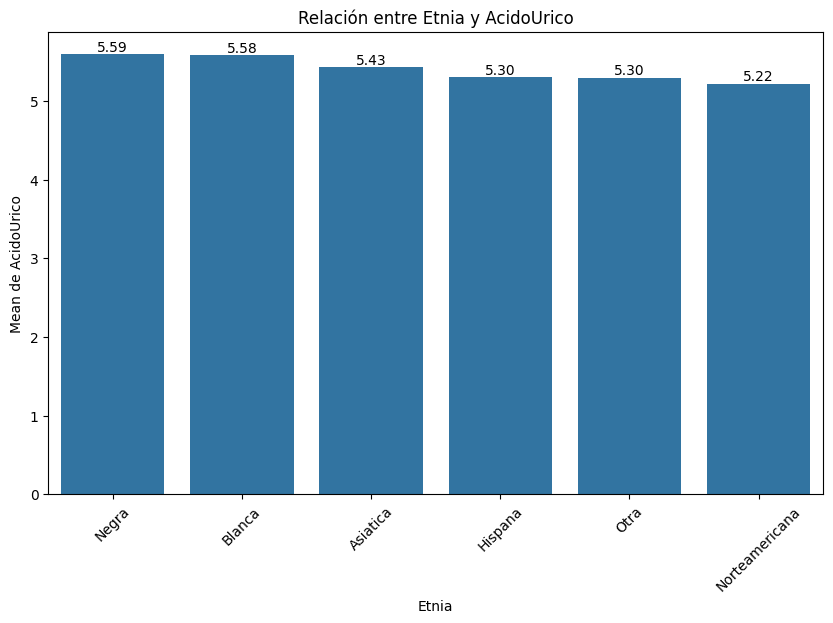

In [ ]:
relacion_categorica_numerica(df, "Etnia", "AcidoUrico", show_values = True, measure = "mean")

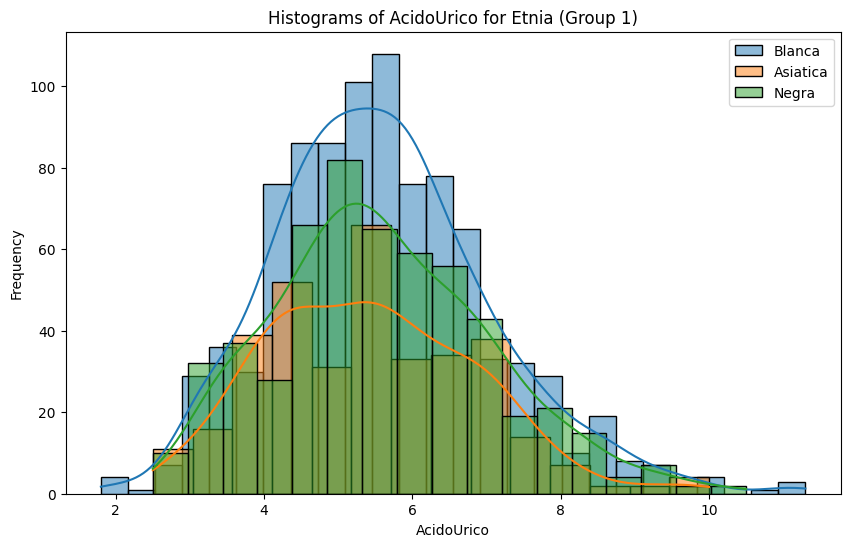

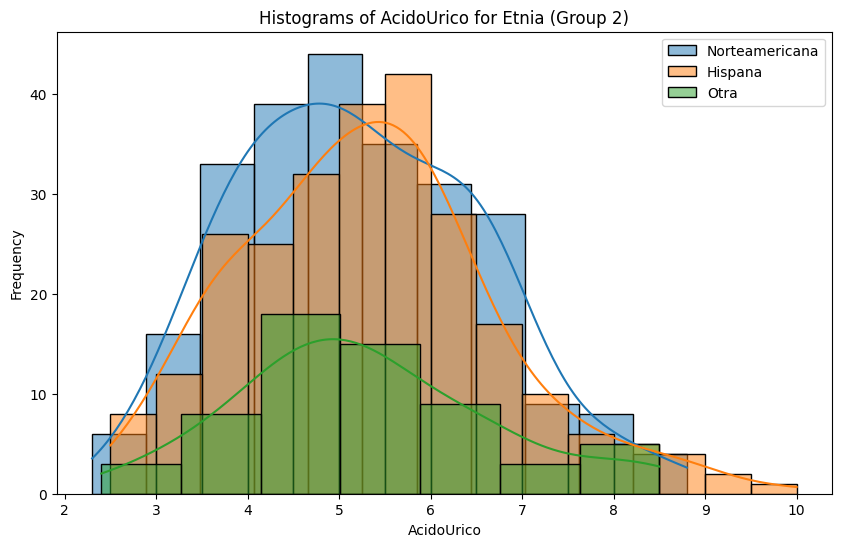

In [ ]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "AcidoUrico", group_size= 3)

Con los valores de ácido úrico pasa lo mismo, no parece que haya mucha diferencia en ellos de una etnia a otra.

In [ ]:
# Obtenemos el valor de ácido úrico en una lista agrupándolo por etnias:
grupos = df["Etnia"].unique()  
au_etnia = [df[df["Etnia"] == grupo]["AcidoUrico"] for grupo in grupos]

f_val, p_val = stats.f_oneway(*au_etnia)
print("F-Value:", f_val)
print("P-Value:", p_val)

F-Value: 4.407008803874997
P-Value: 0.0005356630919000294


C:\Users\mpuch\AppData\Local\Temp\ipykernel_16192\797934367.py:5: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_val, p_val = stats.f_oneway(*au_etnia)


**Glucosa en sangre:**

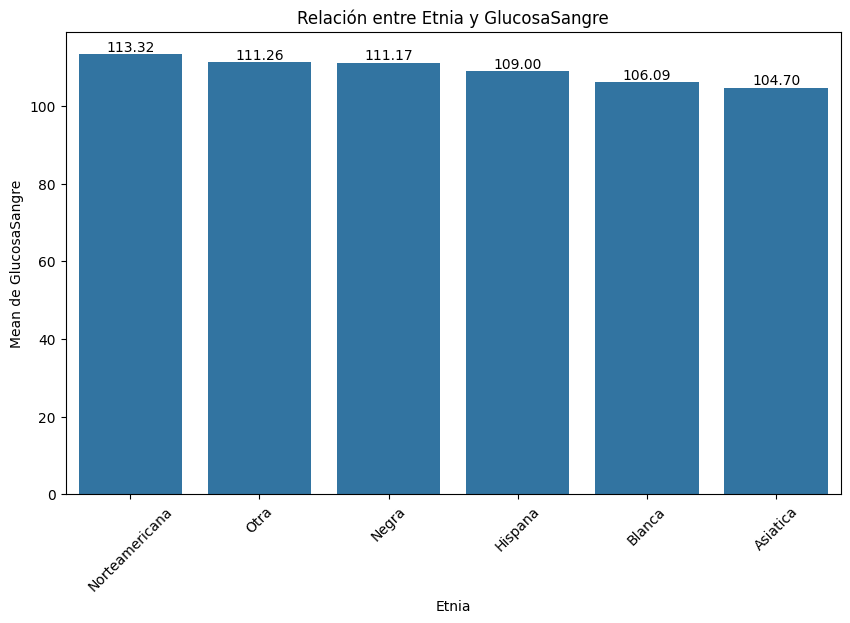

In [ ]:
relacion_categorica_numerica(df, "Etnia", "GlucosaSangre", show_values = True, measure = "mean")

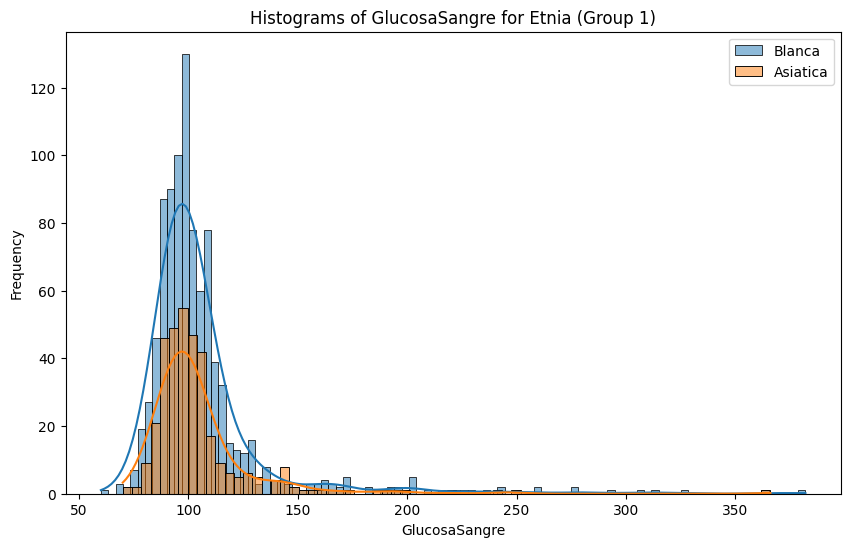

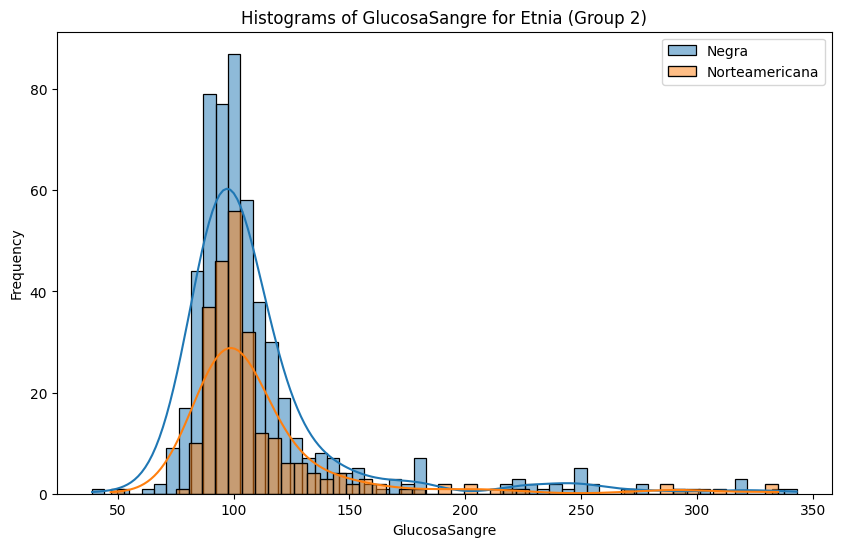

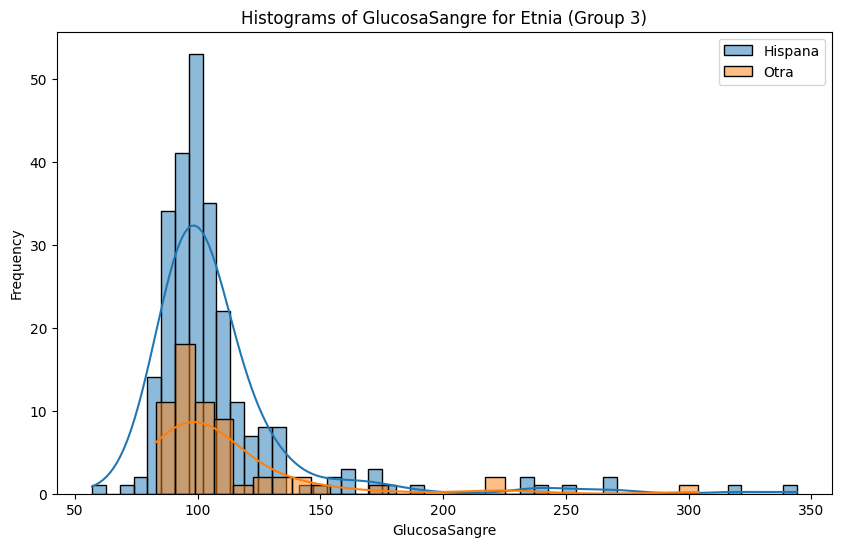

In [ ]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "GlucosaSangre", group_size= 2)

**HDL:**

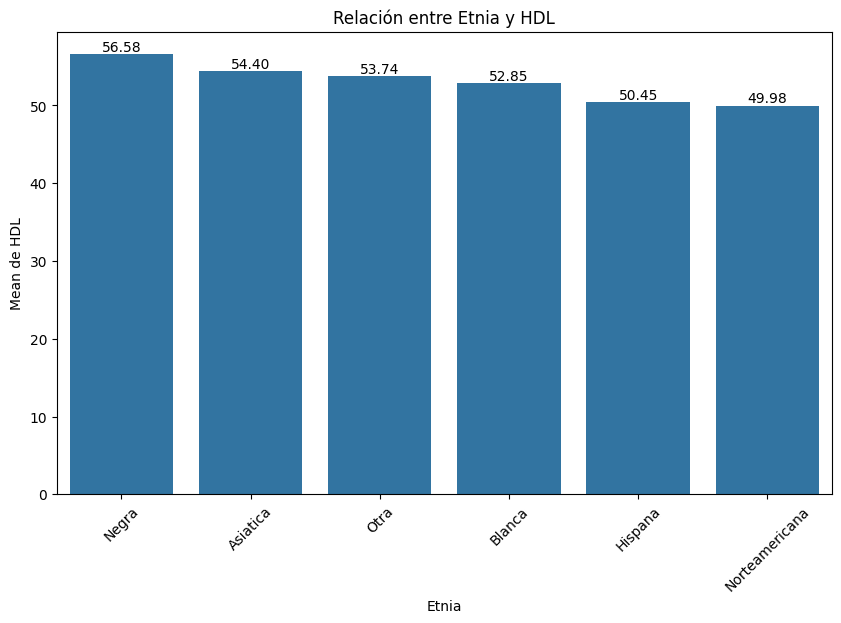

In [ ]:
relacion_categorica_numerica(df, "Etnia", "HDL", show_values = True, measure = "mean")

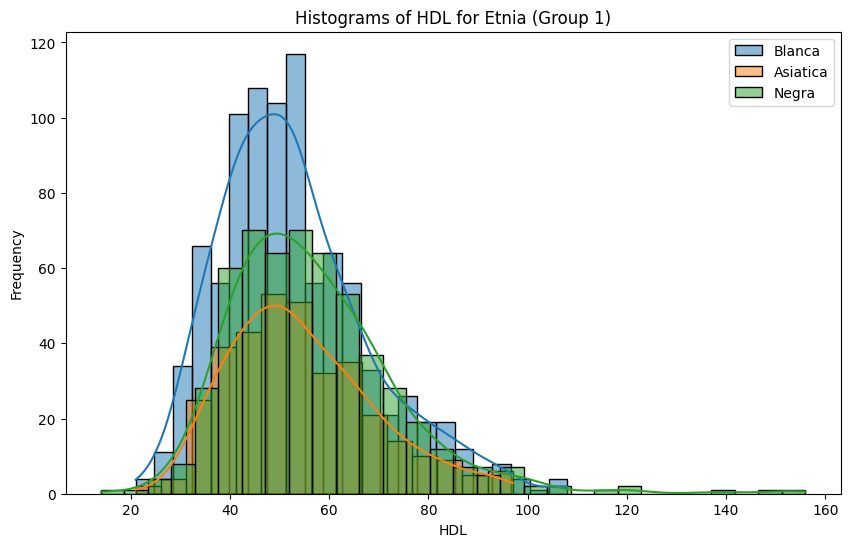

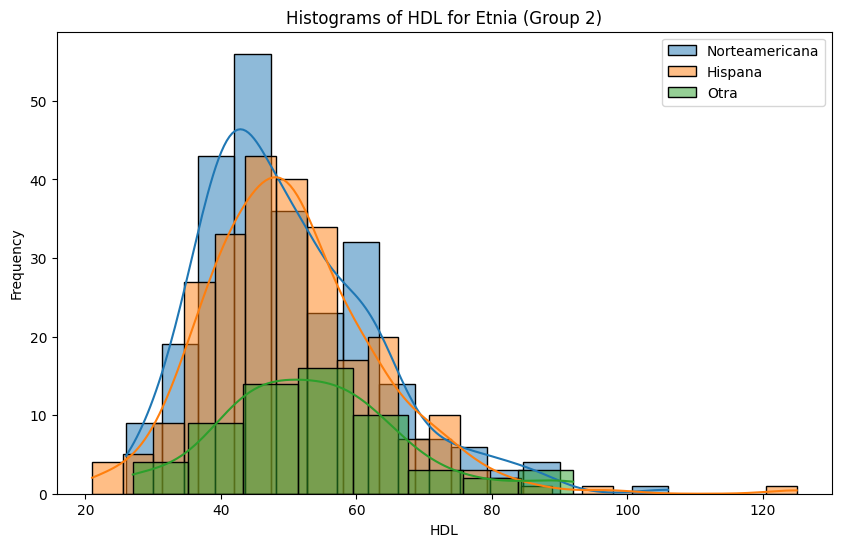

In [ ]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "HDL", group_size= 3)

**Triglicéridos:**

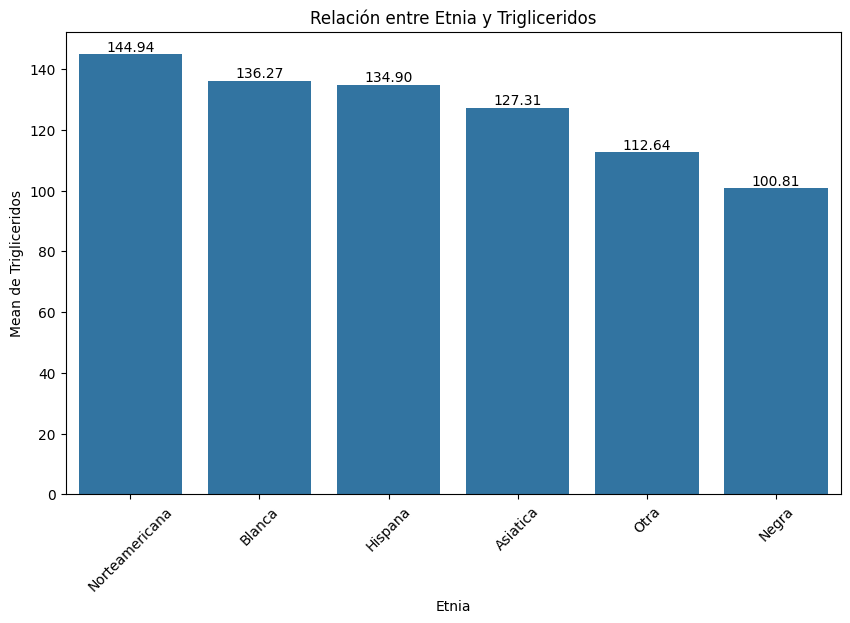

In [ ]:
relacion_categorica_numerica(df, "Etnia", "Trigliceridos", show_values = True, measure = "mean")

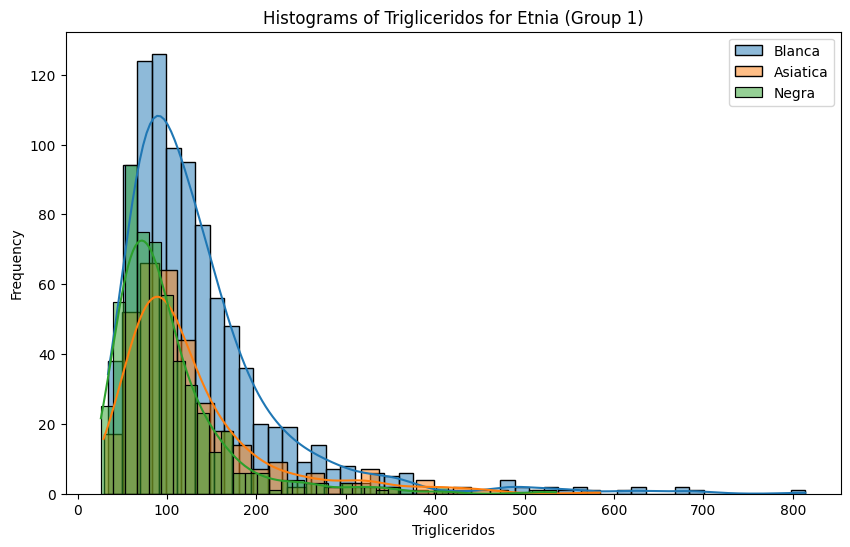

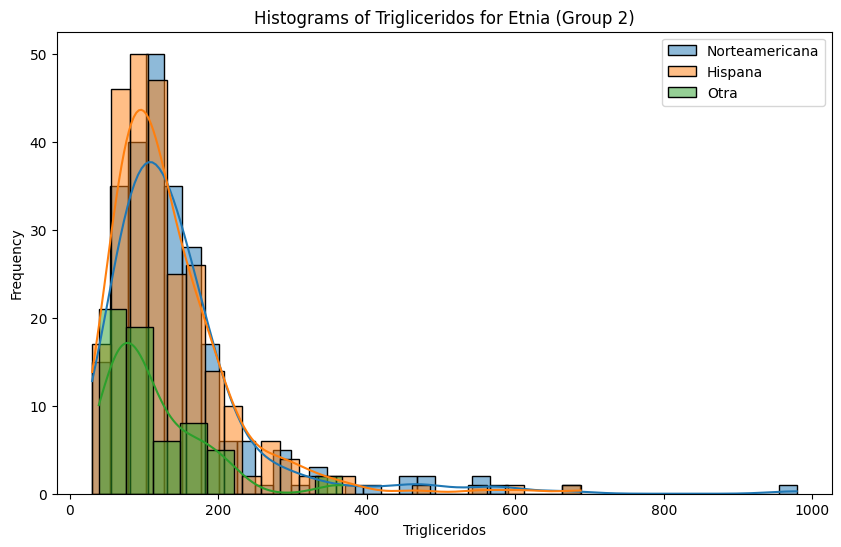

In [ ]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "Trigliceridos", group_size= 3)

Tras analizar los gráficos de los diferentes indicadores sanguíneos por etnia, vemos que coinciden con los resultados anteriormente vistos:
- La media de valores de glucosa en sangre y triglicéridos más alta está en el grupo de los norteamericanos.
- La media más baja de los valores de HDL aparece también en la etnia norteamericana y en la hispana.
- Los asiáticos y negros son los que mejores valores tienen en general. Aunque nos llama la atención que la etnia negra tiene valores de glucosa en sangre parecidos a los norteamericanos, sin embargo, tienen menor porcentaje de positivos en sindrome metabólico.

#### CONCLUSIONES ANÁLISIS BIVARIANTE INICIAL

Las conclusiones y datos interesantes tras analizar las variables de manera cruzada son:
1. Los ingresos son influyentes en la existencia o no de un diagnóstico de síndrome metabólico: a menos ingresos, más casos.
1. El estado civil del sujeto también es una variable a tener en cuenta: sujetos separados y viudos tienen mayor porcentaje de diagnósticos, mientras que solteros tienen el menor.
1. La etnia está relacionada con la presencia de síndrome metabólico: los norteamericanos e hispanos tienen los mayores porcentajes de positivos.
1. Observamos una clara relación entre edad y síndrome metabólico: a mayor edad, mayor número de casos.
1. El IMC en la población negra es el más alto, sin embargo, no son el grupo que más diagnósticos tiene. 
1. La etnia norteamericana tiene una media de circunferencia de la cintura muy parecida a la que tienen otras etnias, pero es una de las que más sujetos con síndrome metabólico tiene.
1. Con respecto a los indicadores sanguíneos y de orina:
    - Todos los valores sanguíneos cuadran con la cantidad de diagnósticos. Los hispanos y norteamericanos tienen peores valores analíticos. Destacamos que la etnia negra tiene valores de glucosa en sangre parecidos a los norteamericanos, pero su porcentaje de positivos es menor.
    - Los indicadores de orina son muy parecidos en todas las poblaciones, aunque sí hay relación entre etnia y valores en orina.

## ANÁLISIS BIVARIANTE EN PROFUNDIDAD

Vamos a realizar un análisis más profundo alrededor de las variables de ingresos. Para ello, vamos a dividir los ingresos por categorías: bajos, medios y altos.

In [ ]:
# Creamos una nueva columna llamada CatIngresos en la que dividimos a los sujetos en 3 categorías: bajos, medios y altos:
bins = [0, 3000, 6000, df.Ingresos.max()]
df["CatIngresos"] = pd.cut(df["Ingresos"], bins = bins, labels = ["Bajos", "Medios", "Altos"])
df.sample()

,Id,Edad,Sexo,EstadoCivil,Ingresos,Etnia,CircunferenciaCintura,IMC,Albuminuria,AcidoUrico,GlucosaSangre,HDL,Trigliceridos,SindromeMetabolico,CatIngresos
2307,71522,63,Mujer,Casado,2000.0,Blanca,109.5,32.8,0,6.9,208,37,231,1,Bajos


c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


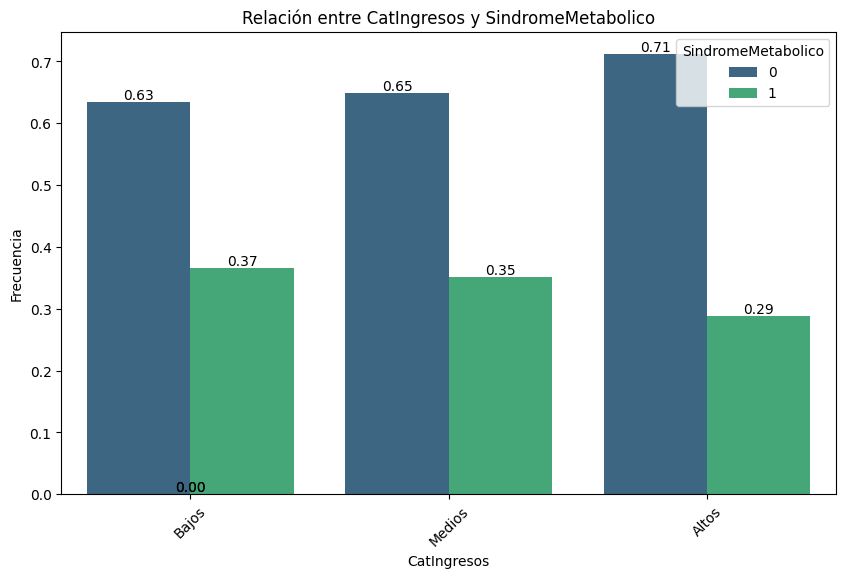

In [ ]:
relacion_categoricas(df, "CatIngresos", "SindromeMetabolico", relative_freq = True, show_values = True)

In [ ]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["SindromeMetabolico"], df["CatIngresos"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 11.69364526786304
P-Value: 0.0028890642045970995
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[842.48436849 307.37515632 429.1404752 ]
 [437.51563151 159.62484368 222.8595248 ]]


Podemos observar cómo la diferencia principal aparece en el grupo de ingresos altos (más de 6000$/mes). Los grupos de ingresos medios y bajos tienen un mayor porcentaje de positivos en síndrome metabólico.

Vamos a analizar también si hay diferencia en la frecuencia relativa de positivos entre hombres y mujeres:

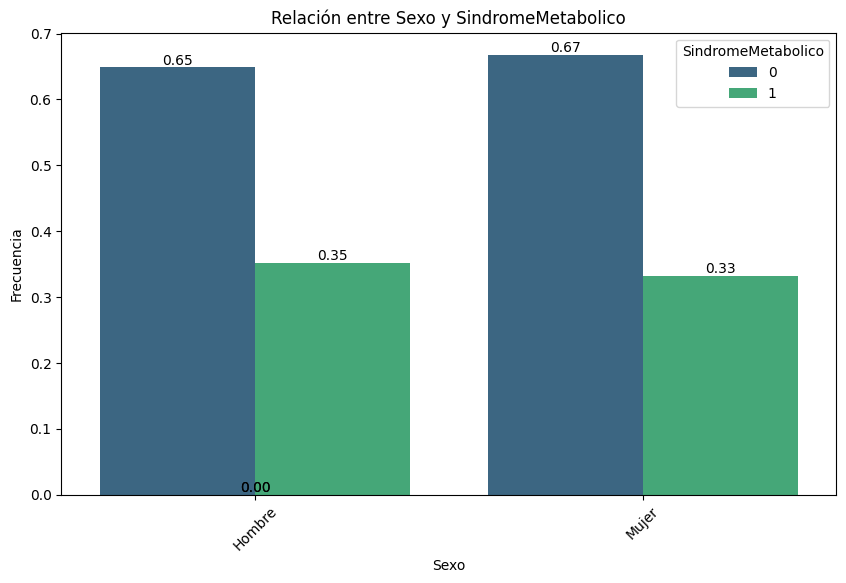

In [ ]:
relacion_categoricas(df, "Sexo", "SindromeMetabolico", relative_freq = True, show_values = True)

In [ ]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["SindromeMetabolico"], df["Sexo"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.9114061281177257
P-Value: 0.3397416066493117
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[782.58899541 796.41100459]
 [406.41100459 413.58899541]]


No hay una relación entre ser hombre y mujer y tener síndrome metabólico.
Aun así, vamos a seguir profundizando para ver qué más información podemos sacar. Empezamos dividiendo el dataset en dos: hombres y mujeres. Vamos a analizar las categorías de ingresos en relación con el síndrome metabólico según el sexo:

In [ ]:
df_hombre = df[df["Sexo"] == "Hombre"]
df_mujer = df[df["Sexo"] == "Mujer"]

CatIngresos - SindromeMetabolico en hombres



c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


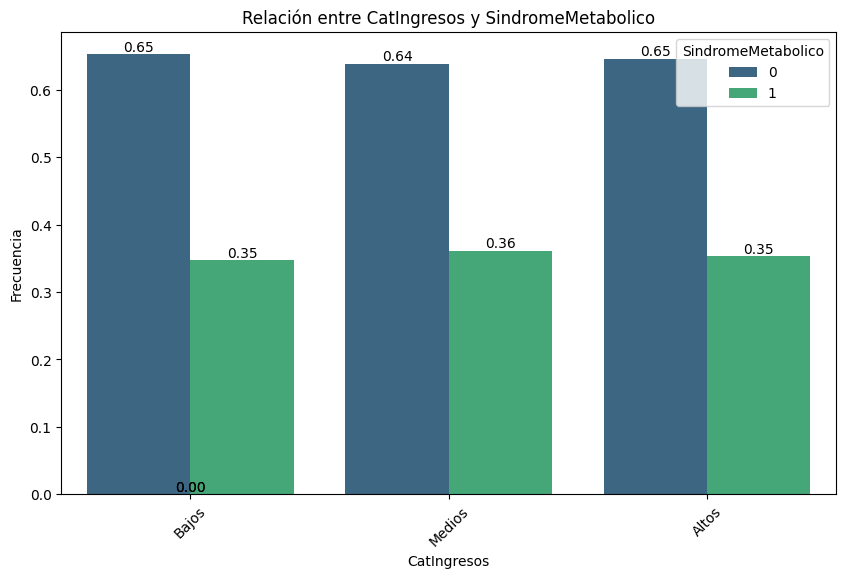

In [ ]:
print("CatIngresos - SindromeMetabolico en hombres\n")
relacion_categoricas(df_hombre, "CatIngresos", "SindromeMetabolico", relative_freq = True, show_values = True)

In [ ]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df_hombre["SindromeMetabolico"], df_hombre["CatIngresos"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.15435002217236482
P-Value: 0.925727826796188
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[409.16820858 147.19680404 214.63498738]
 [221.83179142  79.80319596 116.36501262]]


Tras realizar el estadístico, confirmamos lo que estamos viendo en la gráfica: en los hombres, los ingresos mensuales no afectan a la hora de ser diagnosticados o no de síndrome metabólico.

CatIngresos - SindromeMetabolico en mujeres



c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


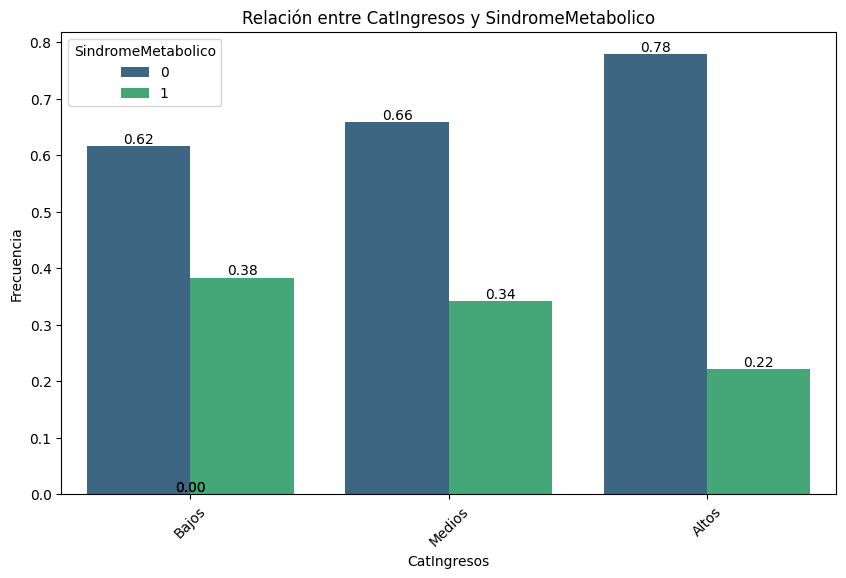

In [ ]:
print("CatIngresos - SindromeMetabolico en mujeres\n")
relacion_categoricas(df_mujer, "CatIngresos", "SindromeMetabolico", relative_freq = True, show_values = True)

In [ ]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df_mujer["SindromeMetabolico"], df_mujer["CatIngresos"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.678271963162484
P-Value: 2.6548139486038004e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[433.38181818 160.26446281 214.35371901]
 [215.61818182  79.73553719 106.64628099]]


Sin embargo, en el grupo de las mujeres sí, parece que en las mujeres con una categoría de ingresos altos es menos probable que aparezca síndrome metabólico.

**Estado civil**

EstadoCivil - SindromeMetabolico en hombres



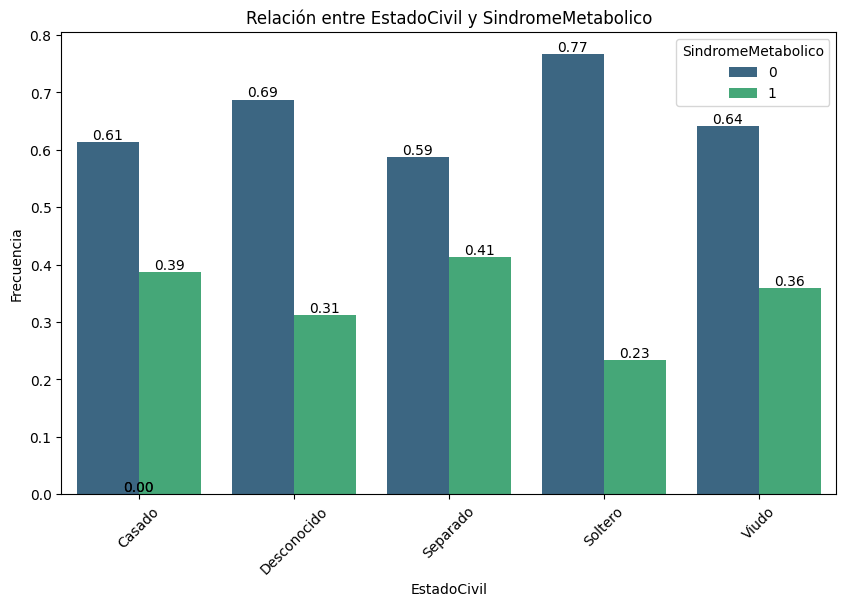

In [ ]:
print("EstadoCivil - SindromeMetabolico en hombres\n")
relacion_categoricas(df_hombre, "EstadoCivil", "SindromeMetabolico", relative_freq = True, show_values = True)

In [ ]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df_hombre["SindromeMetabolico"], df_hombre["EstadoCivil"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 21.62534545979153
P-Value: 0.00023793814463909447
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[416.94953743  72.62573591 100.50883095 155.62657696  25.28931876]
 [226.05046257  39.37426409  54.49116905  84.37342304  13.71068124]]


EstadoCivil - SindromeMetabolico en mujeres



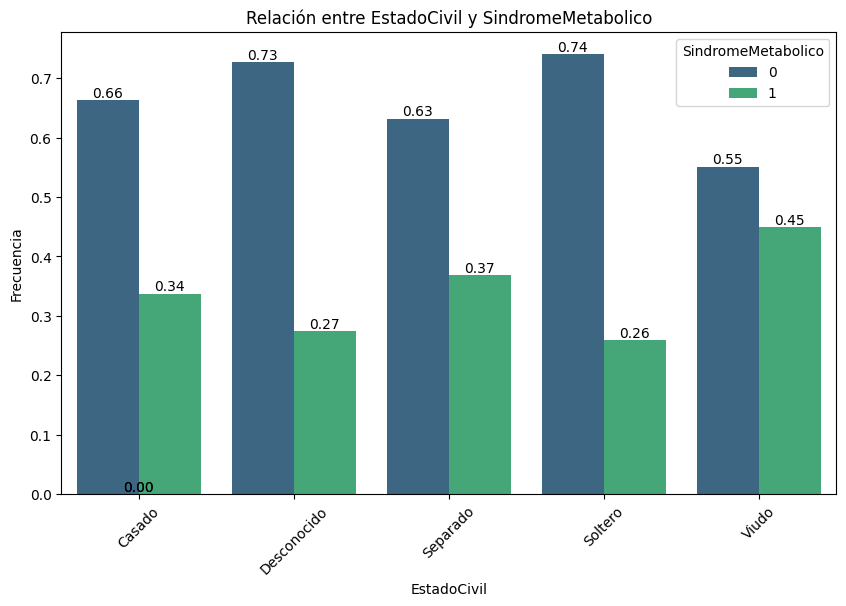

In [ ]:
print("EstadoCivil - SindromeMetabolico en mujeres\n")
relacion_categoricas(df_mujer, "EstadoCivil", "SindromeMetabolico", relative_freq = True, show_values = True)

In [ ]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df_mujer["SindromeMetabolico"], df_mujer["EstadoCivil"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 16.49682382210083
P-Value: 0.002420066984726578
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[365.93719008  63.43801653 121.5338843  172.28429752  84.80661157]
 [182.06280992  31.56198347  60.4661157   85.71570248  42.19338843]]


Con respecto al estado civil, tanto en hombres como en mujeres tiene relación con el diagnóstico, pero encontramos diferencias:
- En hombres: los hombres casados, separados y viudos tienen un porcentaje muy parecido.
- En mujeres: las mujeres viudas tienen un mayor porcentaje, seguido de las separadas y casadas.
- En ambos grupos, los solteros tienen un menor porcentaje.

Vamos a indagar en todos los sujetos solteros del dataset.

In [ ]:
df_solteros = df[df["EstadoCivil"] == "Soltero"]

(2,)


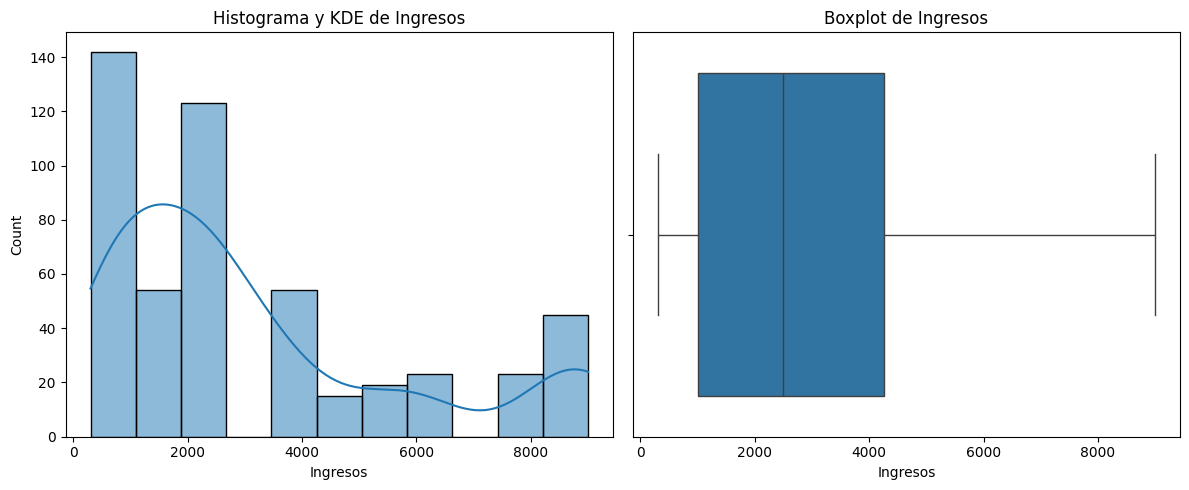

In [ ]:
histograma_caja_bigotes(df_solteros, ["Ingresos"])

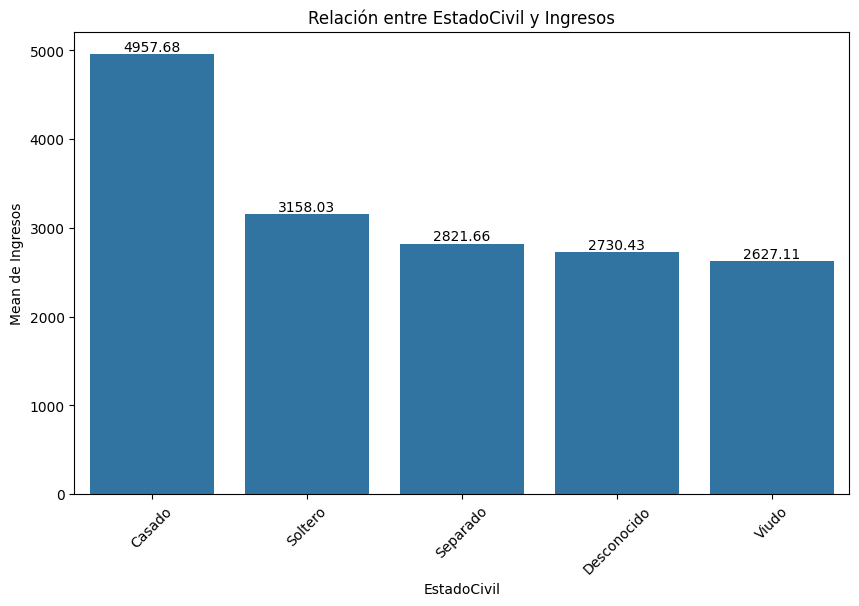

In [ ]:
relacion_categorica_numerica(df, "EstadoCivil", "Ingresos", show_values=True, measure='mean')

In [ ]:
# Obtenemos el valor de ingresos en una lista agrupándolo por estado civil:
grupos = df["EstadoCivil"].unique()  
estadocivil_ingresos = [df[df["EstadoCivil"] == grupo]["Ingresos"] for grupo in grupos]

f_val, p_val = stats.f_oneway(*estadocivil_ingresos)
print("F-Value:", f_val)
print("P-Value:", p_val)

F-Value: 86.67164042808932
P-Value: 7.53298536407806e-69


C:\Users\mpuch\AppData\Local\Temp\ipykernel_22672\2295919332.py:4: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_val, p_val = stats.f_oneway(*estadocivil_ingresos)


Podemos observar cómo el grupo de separados y viudos tienen menores ingresos, podría ser algo a tener en cuenta (sobre todo en mujeres, que afecta más la cantidad de ingresos). Hay relación estadística entre ingresos y estado civil.

**Etnia-Ingresos**

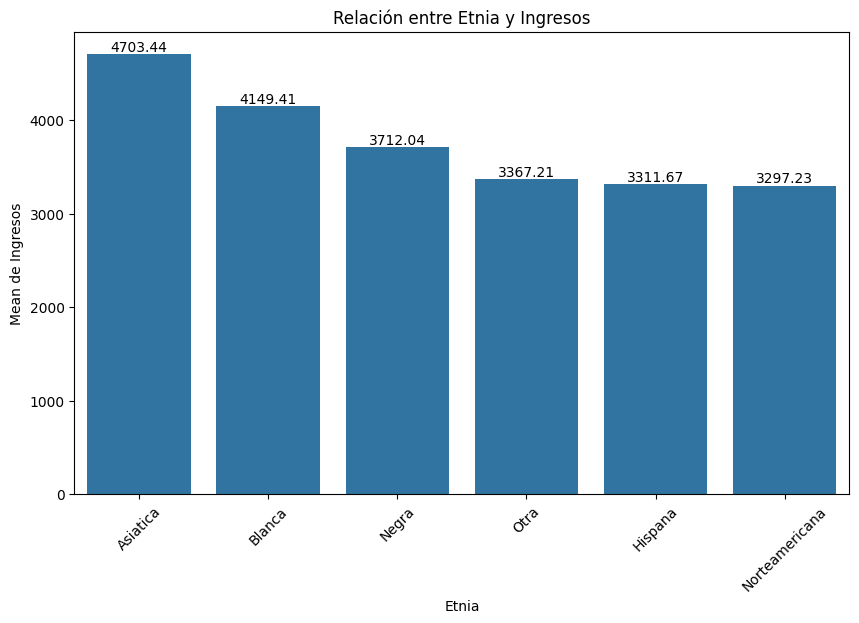

In [ ]:
relacion_categorica_numerica(df, "Etnia", "Ingresos", show_values=True, measure='mean')

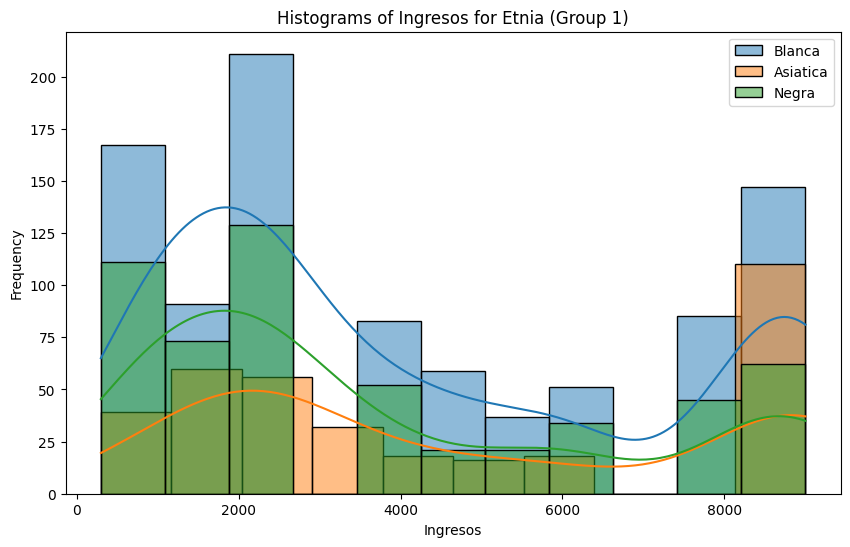

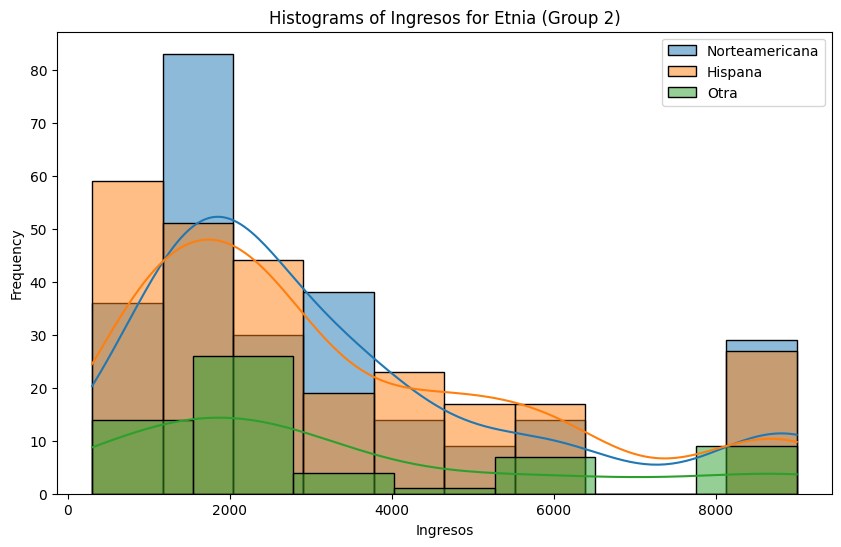

In [ ]:
histogramas_agrupados(df, "Etnia", "Ingresos", group_size = 3)

In [ ]:
# Obtenemos el valor de ingresos en una lista agrupándolo por etnias:
grupos = df["Etnia"].unique()  
estadocivil_ingresos = [df[df["Etnia"] == grupo]["Ingresos"] for grupo in grupos]

f_val, p_val = stats.f_oneway(*estadocivil_ingresos)
print("F-Value:", f_val)
print("P-Value:", p_val)

F-Value: 12.143879082806604
P-Value: 1.2158376355248016e-11


C:\Users\mpuch\AppData\Local\Temp\ipykernel_22672\1553515130.py:4: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_val, p_val = stats.f_oneway(*estadocivil_ingresos)


También encontramos relación entre etnias e ingresos, observando menos ingresos en la etnia hispana y norteamericana, teniendo ambas un mayor porcentaje de positivos en síndrome metabólico.

**Etnia-EstadoCivil**

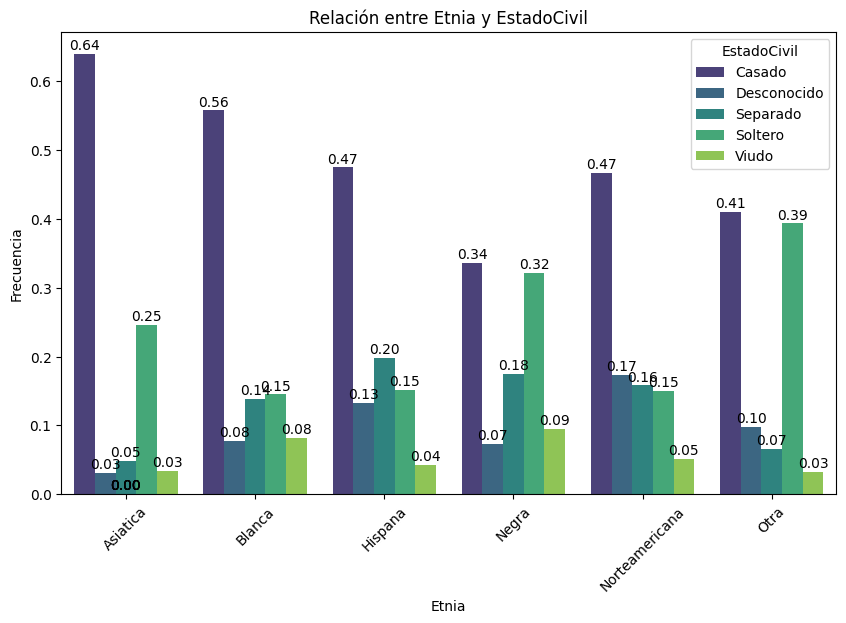

In [ ]:
relacion_categoricas(df, "Etnia", "EstadoCivil", relative_freq = True, show_values = True, size_group = 6)

In [ ]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["Etnia"], df["EstadoCivil"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 219.733139777218
P-Value: 1.349970677486738e-35
Grados de Libertad: 20
Tabla de Frecuencias Esperadas:
 [[173.2634431   30.11379742  49.0258441   72.44768654  24.14922885]
 [462.20133389  80.33222176 130.78240934 193.26302626  64.42100875]
 [127.58941226  22.17548979  36.10212589  53.34972905  17.78324302]
 [272.05835765  47.28470196  76.9804085  113.75739892  37.91913297]
 [125.60358483  21.83034598  35.54022509  52.51938308  17.50646103]
 [ 30.28386828   5.2634431    8.56898708  12.66277616   4.22092539]]


Existe relación estadística entre la etnia y el estado civil. Destacamos que en la población asiática y negra hay un alto porcentaje de solteros, grupo que tiene un menor porcentaje de síndrome metabólico.

### CONCLUSIONES TRAS PROFUNDIZAR

Relacionando el sexo con los ingresos y el estado civil:
1. El grupo con menor porcentaje de síndrome metabólico es el que tiene la categoría de ingresos alta: > 6000$/mes.
2. El sexo es importante para decidir el peso de los ingresos: las mujeres con ingresos altos tienen menos porcentaje de positivos, mientras que en los hombres los ingresos parecen no ser importantes.
3. Con respecto al estado civil, tanto en hombres como en mujeres tiene relación con el diagnóstico, pero encontramos diferencias:
    - En hombres: los hombres casados, separados y viudos tienen un porcentaje muy parecido.
    - En mujeres: las mujeres viudas tienen un mayor porcentaje, seguido de las separadas y casadas.
    - En ambos grupos, los solteros tienen un menor porcentaje.

    
Relacionando el estado civil con ingresos y etnias:
1. El grupo de separados y viudos tienen menores ingresos, podría ser algo a tener en cuenta (sobre todo en mujeres, que afecta más la cantidad de ingresos). Sin embargo, el de solteros no tiene los mayores ingresos.
2. Observamos menos ingresos en la etnia hispana y norteamericana, teniendo ambas un mayor porcentaje de positivos en síndrome metabólico.
3. Destacamos que en la población asiática y negra hay un alto porcentaje de solteros, grupo que tiene un menor porcentaje de síndrome metabólico.

## ANÁLISIS VARIABLES NUMÉRICAS MULTIVARIANTE

No vamos a profundizar demasiado en estas variables, ya que la mayoría forman parte de los criterios diagnósticos y lo que nosotros queremos estudiar son los factores demográficos. Aun así, vamos a ver si podemos sacar algo interesante sin profundizar demasiado.

Vamos a analizar la relación entre el IMC, la etnia y el síndrome metabólico:

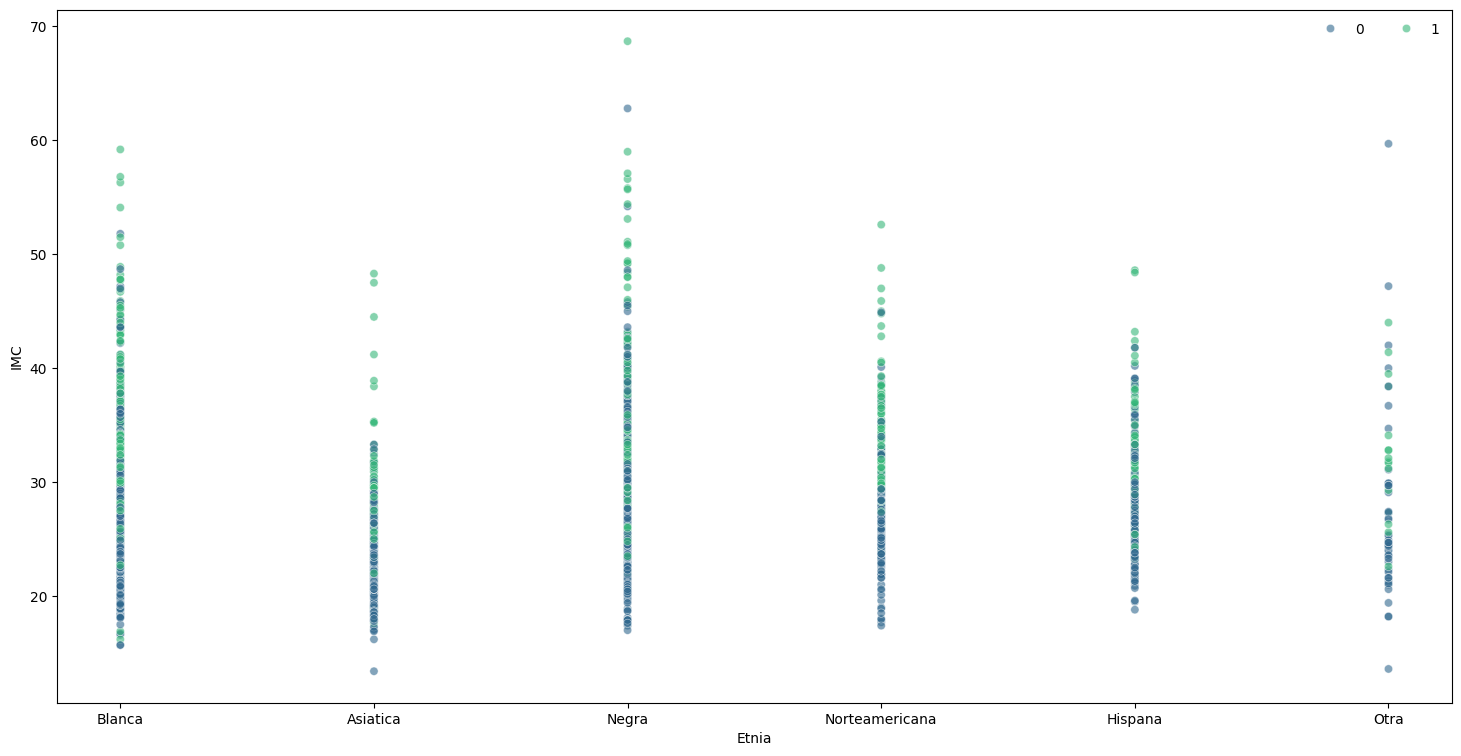

In [ ]:
dispersion_cuatro_var(df, "Etnia", "IMC", color_col = "SindromeMetabolico")

Vemos que en los IMCs más altos predominan los positivos de síndrome metabólico, aunque encontramos excepciones.

A continuación, observamos los valores de ácido úrico relacionándolos con la etnia y la presencia o no de síndrome metabólico:

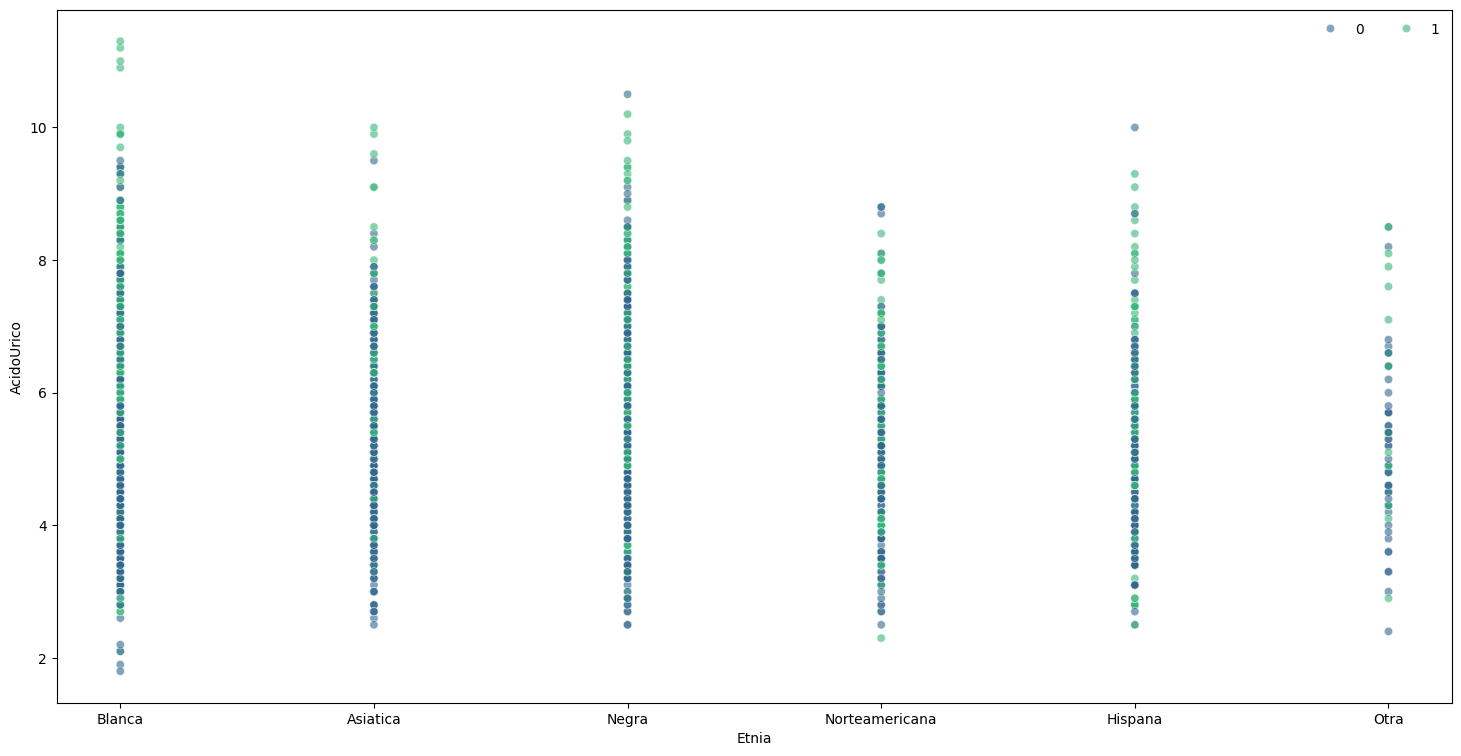

In [ ]:
dispersion_cuatro_var(df, "Etnia", "AcidoUrico", color_col = "SindromeMetabolico")

Podemos observar una mayor concentración de sujetos con síndrome metabólico en la parte más alta de la gráfica, es decir, con valores más altos de ácido úrico. Sí podemos ver una tendencia aunque el valor de ácido úrico no sea uno de los criterios diagnósticos del síndrome.

**Correlación entre variables numéricas:**

Nuestro objetivo en este análisis es conocer la importancia de las variables demográficas con respecto al síndrome metabólico, pero vamos a mirar qué correlación hay entre las variables numéricas del dataset por si hubiera alguna relación que no hayamos previsto.

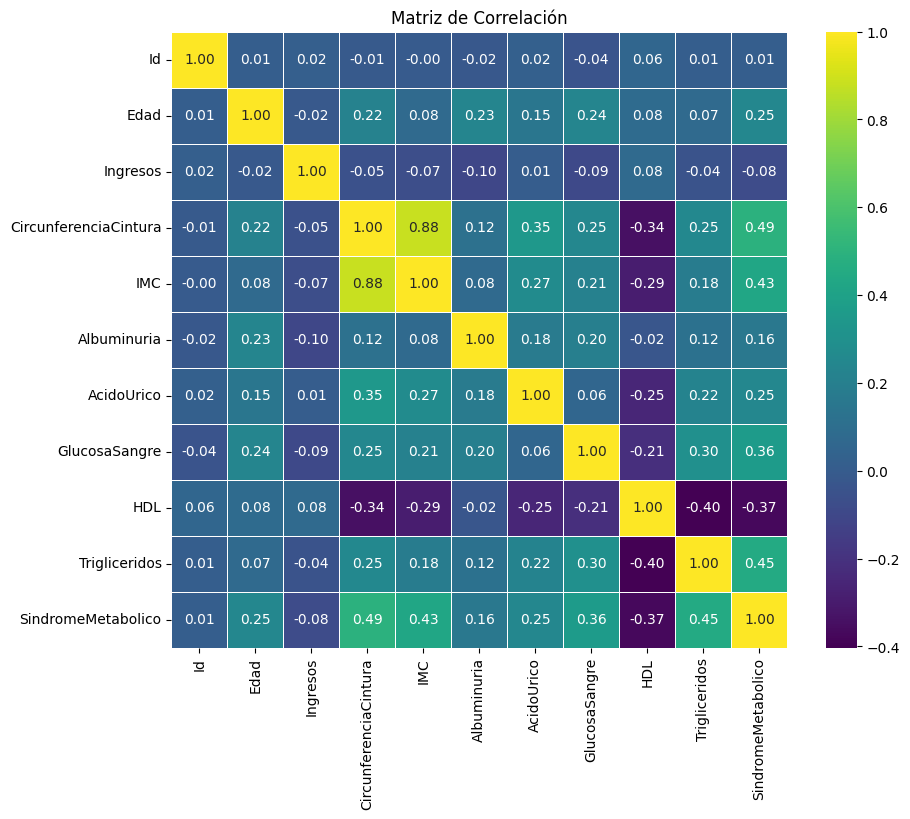

In [ ]:
# Creamos una matriz de correlación con las variables numéricas:
corr_matrix = df.corr(numeric_only= True)

# Generamos un mapa de calor a partir de esa matriz de correlaciones:
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True, square=True, linewidths=.5) 
plt.title('Matriz de Correlación')
plt.show()

Los valores están cerca del 0, es decir, no hay mucha correlación ni positiva ni negativa entre variables. La única destacable es la relación entre IMC y circunferencia de la cintura, que tienen una correlación positiva (0.88).

#### CONCLUSIONES TRAS ANÁLISIS DE VARIABLES NUMÉRICAS

- Parece que los IMCs más altos se pueden correlacionar con síndrome metabólico, ya que vemos correlación entre IMC y circunferencia de la cintura, que es uno de los parámetros de diagnóstico.
- Podemos observar una mayor concentración de sujetos con síndrome metabólico con valores más altos de ácido úrico. Sí podemos ver cierta tendencia aunque el valor de ácido úrico no sea uno de los criterios diagnósticos del síndrome. De todas formas, hay muchos valores no que siguen esta tendencia.